## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Reading data

Note that we dismiss Canary Islands, Balearic Islands Ceuta and Melilla because they are not considered in the demand data 

In [2]:
cities = pd.read_csv('cities_unified.csv', header = 0)
cities = cities[(cities['Provincias'] != 'Melilla') & (cities['Provincias'] != 'Ceuta') & (cities['Provincias'] != 'Santa Cruz de Tenerife') & (cities['Provincias'] != 'Palmas, Las') & (cities['Provincias'] != 'Balears, Illes')]
cities.reset_index(drop=True, inplace = True)
cities.tail()

Codigos    Provincias    Latitud  Longitud      2014      2015      2016  \
43       47    Valladolid  41.634126 -4.847191    529157    526288    523679   
44       48       Bizkaia  43.237680 -2.852600   1151905   1148775   1147576   
45       49        Zamora  41.727174 -5.980539    185432    183436    180406   
46       50      Zaragoza  41.620365 -1.064497    960111    956006    950507   
47        0  TOTAL ESPAÑA  39.695119 -3.202023  46771341  46624382  46557008   

        2017      2018      2019      2020      2021      2022      2023  
43    521130    519851    519546    520649    519361    517975    521333  
44   1148302   1149628   1152651   1159443   1154334   1149344   1153282  
45    177404    174549    172539    170588    168725    167215    166927  
46    953486    954811    964693    972528    967452    966438    979365  
47  46572132  46722980  47026208  47450795  47385107  47475420  48085361

In [3]:
ipc = pd.read_csv('IPC.csv', header = 0)
ipc = ipc[(ipc['Provincia'] != 'Melilla') & (ipc['Provincia'] != 'Ceuta') & (ipc['Provincia'] != 'Santa Cruz de Tenerife') & (ipc['Provincia'] != 'Palmas, Las') & (ipc['Provincia'] != 'Balears, Illes')]
ipc.reset_index(drop=True, inplace = True)
ipc.tail()

Codigo     Provincia  1-2014  2-2014  3-2014  4-2014  5-2014  6-2014  \
43      47    Valladolid   93498   93451   93566   94419   94369   94419   
44      48       Bizkaia   92529   92402   92640   93555   93525   93561   
45      49        Zamora   93284   93234   93511   94390   94414   94352   
46      50      Zaragoza   93588   93570   93708   94676   94661   94614   
47       0  TOTAL ESPAÑA   93373   93333   93541   94373   94395   94421   

    7-2014  8-2014  ...  3-2023  4-2023  5-2023  6-2023  7-2023  8-2023  \
43   93600   93776  ...  111670  112360  112194  112770  112780  113328   
44   92738   92900  ...  111128  111660  111744  112665  112700  113205   
45   93307   93525  ...  113086  113937  113791  114536  114620  115011   
46   93792   93965  ...  110967  111417  111269  111873  112310  112893   
47   93533   93681  ...  111111  111773  111719  112354  112544  113149   

    9-2023  10-2023  11-2023  12-2023  
43  113457   114086   113459   113537  
44  113485   113534   113198   113152  
45  115115   115517   114885   115055  
46  112907   113042   112828   112710  
47  113348   113676   113280   113308  

[5 rows x 122 columns]

In [4]:
ipc.columns

Index(['Codigo', 'Provincia', '1-2014', '2-2014', '3-2014', '4-2014', '5-2014',
       '6-2014', '7-2014', '8-2014',
       ...
       '3-2023', '4-2023', '5-2023', '6-2023', '7-2023', '8-2023', '9-2023',
       '10-2023', '11-2023', '12-2023'],
      dtype='object', length=122)

In [5]:
demanda_meteo = pd.read_csv('demanda_meteo.csv', header = 0)
demanda_meteo['Datetime'] = pd.to_datetime(demanda_meteo['Datetime'])
demanda_meteo.head()

Datetime  Demanda Real  Demanda Prevista  Demanda Programada  \
0 2014-01-01 00:00:00   24301.66667       23878.33333             24099.0   
1 2014-01-01 01:00:00   23365.33333       23322.00000             22269.0   
2 2014-01-01 02:00:00   21672.50000       21711.16667             21136.0   
3 2014-01-01 03:00:00   20192.00000       20230.33333             19911.0   
4 2014-01-01 04:00:00   19220.66667       19215.33333             19060.0   

   Precio  temperature_2m_1  cloud_cover_1  wind_speed_100m_1  \
0   37.21            7.4985      71.700000          16.099690   
1   30.57            7.0485      72.899994          17.388409   
2   26.30            7.3985      43.800000          19.319628   
3   26.18            7.3485      55.499996          20.140705   
4   22.40            7.4985      59.399998          21.995380   

   temperature_2m_2  cloud_cover_2  ...  wind_speed_100m_50  \
0             7.874          100.0  ...           30.758411   
1             7.724          100.0  ...           30.312773   
2             7.574          100.0  ...           27.792374   
3             7.424          100.0  ...           25.772078   
4             7.374          100.0  ...           23.732710   

   temperature_2m_51  cloud_cover_51  wind_speed_100m_51  temperature_2m_52  \
0          11.714001            57.0           17.339897          10.032000   
1          11.614000            66.9           18.000000           9.731999   
2          11.564000            60.9           17.651016           9.932000   
3          11.464001            79.5           18.430452          10.432000   
4          11.464001            59.1           18.161278          10.582000   

   cloud_cover_52  wind_speed_100m_52  temperature_2m_0  cloud_cover_0  \
0       28.200000           11.659777          5.797365      68.828575   
1       30.900002           10.661107          5.715474      71.172159   
2       39.600002           11.212135          5.624262      69.682602   
3       56.100000           12.620554          5.599732      69.287974   
4       79.200000           14.058450          5.659303      68.095021   

   wind_speed_100m_0  
0          18.621431  
1          18.500503  
2          18.425005  
3          18.209923  
4          18.082791  

[5 rows x 164 columns]

In [6]:
festivos = pd.read_csv('Festivos.csv', header = 0)
festivos['Day'] = pd.to_datetime(festivos['Day'])
festivos = festivos.drop(['Melilla', 'Ceuta', 'Santa Cruz de Tenerife', 'Palmas, Las', 'Balears, Illes'], axis = 1)
festivos.head()

Day Day of the week  Coruña, A  Albacete  Alicante/Alacant  Almería  \
0 2014-01-01               X          1         1                 1        1   
1 2014-01-02               J          0         0                 0        0   
2 2014-01-03               V          0         0                 0        0   
3 2014-01-04               S          0         0                 0        0   
4 2014-01-05               D          0         0                 0        0   

   Araba/Álava  Asturias  Badajoz  Barcelona  ...  Soria  Tarragona  Teruel  \
0            1         1        1          1  ...      1          1       1   
1            0         0        0          0  ...      0          0       0   
2            0         0        0          0  ...      0          0       0   
3            0         0        0          0  ...      0          0       0   
4            0         0        0          0  ...      0          0       0   

   Toledo  Valencia/València  Valladolid  Zamora  Zaragoza  Ávila  sumafest  
0       1                  1           1       1         1      1  1.000000  
1       0                  0           0       0         0      0  0.019659  
2       0                  0           0       0         0      0  0.000000  
3       0                  0           0       0         0      0  0.000000  
4       0                  0           0       0         0      0  1.000000  

[5 rows x 50 columns]

In [7]:
pib = pd.read_csv('PIB.csv', header = 0)
pib.head()

Codigo     Provincia  1-2014  2-2014  3-2014  4-2014  5-2014  6-2014  \
0       0  TOTAL ESPAÑA  925468  925468  925468  969598  969598  969598   

   7-2014  8-2014  ...   3-2023   4-2023   5-2023   6-2023   7-2023   8-2023  \
0  960418  960418  ...  1099141  1139036  1139036  1139036  1127405  1127405   

    9-2023  10-2023  11-2023  12-2023  
0  1127405  1171293  1171293  1171293  

[1 rows x 122 columns]

## X and Y creation and definition of the metrics

In [8]:
dias_semana = {0:'L', 1:'M', 2:'X', 3:'J', 4:'V', 5:'S', 6:'D'}

def build_df_diario (n=28):
    df = {'Datetime':[], 'F':[], 'L':[], 'M':[], 'X':[], 'J':[], 'V':[], 'S':[], 'IPC':[]}
    for i in range (len(festivos)):
        aux = {}
        aux['Datetime']=festivos['Day'][i]
        fest = festivos['sumafest'][i]
        aux['F']=fest
        for j in dias_semana.keys():
            aux[dias_semana[j]]=0
        aux[festivos['Day of the week'][i]] = 1-fest
        aux['IPC']=ipc[str(festivos['Day'][i].month)+'-'+str(festivos['Day'][i].year)][47]        
        for name in df.keys():
            df[name].append(aux[name])
        
            
    df = pd.DataFrame(df)
    return df
    
df_diario = build_df_diario()
df_diario    

Datetime         F    L    M    X         J    V    S     IPC
0    2014-01-01  1.000000  0.0  0.0  0.0  0.000000  0.0  0.0   93373
1    2014-01-02  0.019659  0.0  0.0  0.0  0.980341  0.0  0.0   93373
2    2014-01-03  0.000000  0.0  0.0  0.0  0.000000  1.0  0.0   93373
3    2014-01-04  0.000000  0.0  0.0  0.0  0.000000  0.0  1.0   93373
4    2014-01-05  1.000000  0.0  0.0  0.0  0.000000  0.0  0.0   93373
...         ...       ...  ...  ...  ...       ...  ...  ...     ...
3647 2023-12-27  0.000000  0.0  0.0  1.0  0.000000  0.0  0.0  113308
3648 2023-12-28  0.000000  0.0  0.0  0.0  1.000000  0.0  0.0  113308
3649 2023-12-29  0.000000  0.0  0.0  0.0  0.000000  1.0  0.0  113308
3650 2023-12-30  0.000000  0.0  0.0  0.0  0.000000  0.0  1.0  113308
3651 2023-12-31  1.000000  0.0  0.0  0.0  0.000000  0.0  0.0  113308

[3652 rows x 9 columns]

In [9]:
def build_base_diaria (df,n=28):
#     base = {'Day':[], 'F':[], 'L':[], 'M':[], 'X':[], 'J':[], 'V':[], 'S':[], 'D':[], 'IPC':[], 'PIB':[]}
    base = {'Datetime':[], 'F':[], 'L':[], 'M':[], 'X':[], 'J':[], 'V':[], 'S':[], 'IPC':[]}
    for i in range (len(festivos)):
        if i-n-2 <= 0:
            continue
        aux = {}
        aux['Datetime']=df['Datetime'][i]
        fest = df['F'][i]
        aux['F']=fest/(np.mean(df['F'][i-(n+1):i-1]))
        for j in dias_semana.keys():
            aux[dias_semana[j]]=0
        if festivos['Day of the week'][i] != 'D':
            aux[festivos['Day of the week'][i]] = (1-fest)/(np.mean(df[festivos['Day of the week'][i]][i-(n+1):i-1]))
        aux['IPC']=df['IPC'][i]/(np.mean(df['IPC'][i-(n+1):i-1]))
        
        for name in base.keys():
            base[name].append(aux[name])
        
            
    base = pd.DataFrame(base)
    return base
    
base_diaria = build_base_diaria(df_diario)
threshold = base_diaria['Datetime'][0]
print (threshold)
base_diaria


2014-02-01 00:00:00


Datetime         F         L    M         X    J    V         S  \
0    2014-02-01  0.000000  0.000000  0.0  0.000000  0.0  0.0  7.000000   
1    2014-02-02  5.479375  0.000000  0.0  0.000000  0.0  0.0  0.000000   
2    2014-02-03  0.000000  9.381147  0.0  0.000000  0.0  0.0  0.000000   
3    2014-02-04  0.000000  0.000000  7.0  0.000000  0.0  0.0  0.000000   
4    2014-02-05  0.000000  0.000000  0.0  7.142554  0.0  0.0  0.000000   
...         ...       ...       ...  ...       ...  ...  ...       ...   
3616 2023-12-27  0.000000  0.000000  0.0  9.377025  0.0  0.0  0.000000   
3617 2023-12-28  0.000000  0.000000  0.0  0.000000  7.0  0.0  0.000000   
3618 2023-12-29  0.000000  0.000000  0.0  0.000000  0.0  7.0  0.000000   
3619 2023-12-30  0.000000  0.000000  0.0  0.000000  0.0  0.0  7.635421   
3620 2023-12-31  4.292915  0.000000  0.0  0.000000  0.0  0.0  0.000000   

           IPC  
0     0.999572  
1     0.999572  
2     0.999587  
3     0.999602  
4     0.999617  
...        ...  
3616  1.000026  
3617  1.000018  
3618  1.000009  
3619  1.000000  
3620  1.000000  

[3621 rows x 9 columns]

In [10]:
def build_df_horario(limit_temp = 15, n=28):
    total = {}
    for h in range (24):
        auxdemanda = demanda_meteo[demanda_meteo['Datetime'].dt.hour == h]
        auxdemanda.reset_index(inplace=True)
        df = {'Datetime':[], 'Demanda': [], 'Frío': [], 'Calor':[], 'Luminosidad':[], 'Viento':[], 'Precio':[]}
        for i in range (len(auxdemanda)):
            aux = {}
            aux['Datetime'] = auxdemanda['Datetime'][i]
            aux['Demanda'] = auxdemanda['Demanda Real'][i]
            if auxdemanda['temperature_2m_0'][i] <= limit_temp:
                aux['Frío'] = limit_temp - auxdemanda['temperature_2m_0'][i]
                aux['Calor'] = 0
                
            else:
                aux['Calor'] = auxdemanda['temperature_2m_0'][i] - limit_temp
                aux['Frío'] = 0 
            
            aux['Luminosidad'] =  auxdemanda['cloud_cover_0'][i]
            aux['Viento'] =  auxdemanda['wind_speed_100m_0'][i]
            aux['Precio'] =  auxdemanda['Precio'][i]
            
            
            for name in df.keys():
                df[name].append(aux[name])
        
        df = pd.DataFrame(df)
        total[h] = df
#         print (total[h]['Datetime'][0])
    return total

df_horario = build_df_horario()
df_horario[0]

Datetime      Demanda       Frío  Calor  Luminosidad     Viento  Precio
0    2014-01-01  24301.66667   9.202635    0.0    68.828575  18.621431   37.21
1    2014-01-02  23484.00000   6.103559    0.0    79.977031  24.778961   22.13
2    2014-01-03  26316.50000   3.969986    0.0    89.985068  23.820243   29.39
3    2014-01-04  26518.50000   5.195904    0.0    60.037528  21.100515   36.54
4    2014-01-05  26163.16667   9.059696    0.0    37.554002  28.819800   18.77
...         ...          ...        ...    ...          ...        ...     ...
3647 2023-12-27  23764.08333  10.990818    0.0    25.002414  10.034331   83.06
3648 2023-12-28  24105.83333   9.999078    0.0    17.844755  10.320123  101.01
3649 2023-12-29  24181.41667   8.944910    0.0    67.415335  10.634693  106.83
3650 2023-12-30  24131.16667   8.344107    0.0    54.630779   8.419498   93.55
3651 2023-12-31  23352.41667   7.884084    0.0    37.384544  19.032784   36.88

[3652 rows x 7 columns]

In [11]:
def build_base_horaria(df,limit_temp = 15, n=28):
    total = {}
    for h in range (24):
        auxdemanda = df[h]
        base = {'Datetime':[], 'Demanda': [], 'Frío': [], 'Calor':[], 'Luminosidad':[], 'Viento':[], 'Precio':[]}
        for i in range (len(auxdemanda)):
            if i-n-2 <= 0:
                continue
            aux = {}
            aux['Datetime']=auxdemanda['Datetime'][i]
            aux['Demanda'] = np.mean(auxdemanda['Demanda'][i-(n+1):i-1])
            if auxdemanda['Frío'][i] != 0:
                aux['Frío'] = auxdemanda['Frío'][i] - np.mean(auxdemanda['Frío'][i-(n+1):i-1])
                aux['Calor'] = 0
            else:
                aux['Frío'] = 0
                aux['Calor'] = auxdemanda['Calor'][i] - np.mean(auxdemanda['Calor'][i-(n+1):i-1])
            aux['Luminosidad'] =  auxdemanda['Luminosidad'][i] - np.mean(auxdemanda['Luminosidad'][i-(n+1):i-1])
            aux['Viento'] =  auxdemanda['Viento'][i] - np.mean(auxdemanda['Viento'][i-(n+1):i-1])
            aux['Precio'] = np.mean(auxdemanda['Precio'][i-(n+1):i-1])
            
            for name in base.keys():
                base[name].append(aux[name])
        
        base = pd.DataFrame(base)
        total[h] = base
#         print (total[h]['Datetime'][0])
    return total

base_horaria = build_base_horaria(df_horario)
base_horaria[0]

Datetime       Demanda      Frío  Calor  Luminosidad     Viento  \
0    2014-02-01  27167.976191 -0.760762    0.0    17.495321   0.009302   
1    2014-02-02  27252.523810  2.218185    0.0   -34.092622   1.775839   
2    2014-02-03  27332.244048  3.399002    0.0   -35.277439  -4.479709   
3    2014-02-04  27359.470238  3.208715    0.0   -21.988243   2.281192   
4    2014-02-05  27397.976191 -1.153874    0.0    41.225355  11.625733   
...         ...           ...       ...    ...          ...        ...   
3616 2023-12-27  24663.095239  3.783525    0.0   -12.404571  -7.300091   
3617 2023-12-28  24543.062500  2.600848    0.0   -18.031058  -6.639650   
3618 2023-12-29  24497.086310  1.301023    0.0    33.487263  -5.986638   
3619 2023-12-30  24479.803571  0.411539    0.0    22.819870  -7.821352   
3620 2023-12-31  24457.139881 -0.296854    0.0     5.629752   3.333625   

         Precio  
0     40.613571  
1     40.819643  
2     40.580714  
3     41.107143  
4     41.065357  
...         ...  
3616  78.093929  
3617  78.728929  
3618  77.881786  
3619  78.584286  
3620  78.503214  

[3621 rows x 7 columns]

In [12]:
base = {}
cols = list (base_diaria.columns) + list (base_horaria[0].columns)[1:]
print (cols)
for h in range (24):
    auxbase = {x:[] for x in cols}
    for i in range (len(base_diaria)):
        for name in cols[:9]:
            auxbase[name].append(base_diaria[name][i])
        for name in cols[9:]:
            auxbase[name].append(base_horaria[h][name][i])
        i += 1
    base[h] = pd.DataFrame(auxbase)
        
base[0]

['Datetime', 'F', 'L', 'M', 'X', 'J', 'V', 'S', 'IPC', 'Demanda', 'Frío', 'Calor', 'Luminosidad', 'Viento', 'Precio']


Datetime         F         L    M         X    J    V         S  \
0    2014-02-01  0.000000  0.000000  0.0  0.000000  0.0  0.0  7.000000   
1    2014-02-02  5.479375  0.000000  0.0  0.000000  0.0  0.0  0.000000   
2    2014-02-03  0.000000  9.381147  0.0  0.000000  0.0  0.0  0.000000   
3    2014-02-04  0.000000  0.000000  7.0  0.000000  0.0  0.0  0.000000   
4    2014-02-05  0.000000  0.000000  0.0  7.142554  0.0  0.0  0.000000   
...         ...       ...       ...  ...       ...  ...  ...       ...   
3616 2023-12-27  0.000000  0.000000  0.0  9.377025  0.0  0.0  0.000000   
3617 2023-12-28  0.000000  0.000000  0.0  0.000000  7.0  0.0  0.000000   
3618 2023-12-29  0.000000  0.000000  0.0  0.000000  0.0  7.0  0.000000   
3619 2023-12-30  0.000000  0.000000  0.0  0.000000  0.0  0.0  7.635421   
3620 2023-12-31  4.292915  0.000000  0.0  0.000000  0.0  0.0  0.000000   

           IPC       Demanda      Frío  Calor  Luminosidad     Viento  \
0     0.999572  27167.976191 -0.760762    0.0    17.495321   0.009302   
1     0.999572  27252.523810  2.218185    0.0   -34.092622   1.775839   
2     0.999587  27332.244048  3.399002    0.0   -35.277439  -4.479709   
3     0.999602  27359.470238  3.208715    0.0   -21.988243   2.281192   
4     0.999617  27397.976191 -1.153874    0.0    41.225355  11.625733   
...        ...           ...       ...    ...          ...        ...   
3616  1.000026  24663.095239  3.783525    0.0   -12.404571  -7.300091   
3617  1.000018  24543.062500  2.600848    0.0   -18.031058  -6.639650   
3618  1.000009  24497.086310  1.301023    0.0    33.487263  -5.986638   
3619  1.000000  24479.803571  0.411539    0.0    22.819870  -7.821352   
3620  1.000000  24457.139881 -0.296854    0.0     5.629752   3.333625   

         Precio  
0     40.613571  
1     40.819643  
2     40.580714  
3     41.107143  
4     41.065357  
...         ...  
3616  78.093929  
3617  78.728929  
3618  77.881786  
3619  78.584286  
3620  78.503214  

[3621 rows x 15 columns]

In [13]:
normalization = False
if normalization:
    normalization_parameters = {i:[] for i in cols[1:]}
    for name in cols[1:]:
        aux = []
        for h in range (24):
            n = len(base[h])
            for j in range (n):
                aux.append(base[h][name][j])
        delta = max(aux)-min(aux)
        minimo = min(aux)
        normalization_parameters[name].append(delta)
        normalization_parameters[name].append(minimo)
        aux = (aux - min(aux))/(max(aux)-min(aux))
        for h in range(24):
            base[h][name] = aux[n*h:n*(h+1)]
    base[0]
    normalization_parameters = pd.DataFrame(normalization_parameters)
    normalization_parameters = normalization_parameters.rename(index={0: 'Delta', 1: 'Minimo'})
    normalization_parameters

In [14]:
años_train = 8
años_validation = 1
años_test = 10 - años_train - años_validation

start_year = 2014
days_year = [365,365,366,365,365,365,366,365,365,365]
days_month = [31,28,31,30,31,30,31,31,30,31,30,31]
days_bisiesto = [31,29,31,30,31,30,31,31,30,31,30,31]

days_training = sum (days_year[:años_train])
hours_training = 24*days_training

days_validation = sum (days_year[años_train:años_train+años_validation])
hours_validation = 24*days_validation

days_testing = sum(days_year[años_train+años_validation:])
hours_testing = 24*days_testing

In [15]:
x = {i:[] for i in range (0,24)}
y = {i:[] for i in range (0,24)}
x_train = {i:[] for i in range (0,24)}
x_val = {i:[] for i in range (0,24)}
x_test = {i:[] for i in range (24)}
y_train = {i:[] for i in range (0,24)}
y_val = {i:[] for i in range (0,24)}
y_test = {i:[] for i in range (24)}
prevision = {i:[] for i in range (0,24)}
prevision_train = {i:[] for i in range (0,24)}
prevision_val = {i:[] for i in range (0,24)}
prevision_test = {i:[] for i in range (0,24)}

In [16]:
for h in range (24):
    aux = base[h]
    
    filtered_df = aux[aux['Datetime'].dt.year - start_year < años_train]
    for index, row in filtered_df.iterrows():
        x_train[h].append(row[1:]) ## dropeamos datetime

    filtered_df = aux[(aux['Datetime'].dt.year - start_year - años_train < años_validation) & (aux['Datetime'].dt.year - start_year - años_train >= 0) ]
    for index, row in filtered_df.iterrows():
        x_val[h].append(row[1:]) ## dropeamos datetime

    filtered_df = aux[(aux['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (aux['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]
    for index, row in filtered_df.iterrows():
        x_test[h].append(row[1:]) ## dropeamos datetime

    x[h] = x_train[h] + x_val[h] + x_test[h] 

In [17]:
auxdemanda = demanda_meteo[demanda_meteo['Datetime']>=threshold]
auxdemanda.reset_index(drop=True, inplace=True)
print (auxdemanda['Datetime'][0])
for i in range (len(auxdemanda)):
    h = auxdemanda['Datetime'][i].hour
#     print (h)
    if normalization:
        real = (auxdemanda['Demanda Real'][i] - normalization_parameters['Demanda']['Minimo'])/normalization_parameters['Demanda']['Delta']
        prevista = (auxdemanda['Demanda Prevista'][i] - normalization_parameters['Demanda']['Minimo'])/normalization_parameters['Demanda']['Delta']
    else:
        real = auxdemanda['Demanda Real'][i]
        prevista = auxdemanda['Demanda Prevista'][i]
    
    y[h].append(real)
    prevision[h].append(prevista)

    if (auxdemanda['Datetime'][i].year- start_year < años_train):
        y_train[h].append(real)
        prevision_train[h].append(prevista)

    elif (auxdemanda['Datetime'][i].year- start_year - años_train < años_validation):
        y_val[h].append(real)
        prevision_val[h].append(prevista)

    elif (auxdemanda['Datetime'][i].year - start_year - años_train - años_validation < años_test):
        y_test[h].append(real)
        prevision_test[h].append(prevista)

2014-02-01 00:00:00


In [18]:
for h in range (24):
    print ('x (', h, '): ', len(x[h]), len(x_train[h]), len(x_val[h]), len(x_test[h]))
    print ('y (', h, '): ', len(y[h]), len(y_train[h]), len(y_val[h]), len(y_test[h]))

x ( 0 ):  3621 2891 365 365
y ( 0 ):  3621 2891 365 365
x ( 1 ):  3621 2891 365 365
y ( 1 ):  3621 2891 365 365
x ( 2 ):  3621 2891 365 365
y ( 2 ):  3621 2891 365 365
x ( 3 ):  3621 2891 365 365
y ( 3 ):  3621 2891 365 365
x ( 4 ):  3621 2891 365 365
y ( 4 ):  3621 2891 365 365
x ( 5 ):  3621 2891 365 365
y ( 5 ):  3621 2891 365 365
x ( 6 ):  3621 2891 365 365
y ( 6 ):  3621 2891 365 365
x ( 7 ):  3621 2891 365 365
y ( 7 ):  3621 2891 365 365
x ( 8 ):  3621 2891 365 365
y ( 8 ):  3621 2891 365 365
x ( 9 ):  3621 2891 365 365
y ( 9 ):  3621 2891 365 365
x ( 10 ):  3621 2891 365 365
y ( 10 ):  3621 2891 365 365
x ( 11 ):  3621 2891 365 365
y ( 11 ):  3621 2891 365 365
x ( 12 ):  3621 2891 365 365
y ( 12 ):  3621 2891 365 365
x ( 13 ):  3621 2891 365 365
y ( 13 ):  3621 2891 365 365
x ( 14 ):  3621 2891 365 365
y ( 14 ):  3621 2891 365 365
x ( 15 ):  3621 2891 365 365
y ( 15 ):  3621 2891 365 365
x ( 16 ):  3621 2891 365 365
y ( 16 ):  3621 2891 365 365
x ( 17 ):  3621 2891 365 365
y ( 1

In [19]:
def metrics (preds, val, normalized = normalization):
    df = {}
    combined_df = pd.DataFrame()
    overall = []
    for h in range (24):
        aux = {}
        if normalized:
            auxpreds = np.array(preds[h])*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
            auxval = np.array(val[h])*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
        else:
            auxpreds = np.array(preds[h])
            auxval = np.array(val[h])
#         datetest = base[h]
        aux['Datetime'] = base[h][(base[h]['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (base[h]['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]['Datetime']
        aux['Error'] = auxpreds-auxval
        aux['Absolute Error'] = abs(aux['Error'])
        aux['Squared Error'] = (auxpreds-auxval)*(auxpreds-auxval)
        aux['Relative Error'] = abs((auxpreds-auxval)/auxval)
        
#         print([[name, len(aux[name])] for name in aux.keys()])
        df[h] = pd.DataFrame(aux)
        df[h]['Datetime'] = pd.to_datetime(df[h]['Datetime'], format='%d-%m-%Y') + pd.DateOffset(hours=h)
        df[h]['Datetime'] = pd.to_datetime(df[h]['Datetime'])
        combined_df = pd.concat((combined_df, df[h]))
        overall.append([h,np.sqrt(np.mean(df[h]['Error']*df[h]['Error'])), np.mean(df[h]['Absolute Error']), np.mean(df[h]['Relative Error']), max(df[h]['Absolute Error'])])

    # Assuming your dictionary is named 'data_dict'
    # Concatenate dataframes from the dictionary into one large dataframe
#     combined_df = pd.concat([d.assign(datetime=pd.to_datetime(df['Datetime'], format='%d-%m-%Y') + pd.DateOffset(hours=hour)) 
#                              for hour, d in df.items()])
#     combined_df = pd.concat([d for d in df.items()])

    # Sort the dataframe by the datetime column
    combined_df = combined_df.sort_values(by='Datetime')

    # Convert datetime column to the desired format (day-month-year hour)
#     combined_df['Datetime'] = combined_df['Datetime'].dt.strptime(combined_df['Datetime'], '%Y-%m-%d %H:%M:%S')

    # Optionally, reset index if needed
    combined_df = combined_df.reset_index(drop=True)

    # Now, combined_df contains the concatenated and sorted dataframe with the desired datetime format,
    # where the hour comes from the key of the dictionary
    
    return combined_df,overall
#     return combined_df

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

linear_models = {}
linear_predictions = {}

for h in range (24):
    linear_models[h] = LinearRegression().fit(x_train[h], y_train[h])
    linear_predictions[h] = linear_models[h].predict(x_test[h])

In [21]:
df_linear, linear_metrics = metrics(linear_predictions, y_test)
linear_metrics

[[0, 1064.9081988022524, 827.9960188410677, 3712.40481101512],
 [1, 1017.3573270269541, 786.0701021356568, 3721.765253843696],
 [2, 1003.1496785005482, 775.0591039215441, 3784.610044509056],
 [3, 1004.3427098317336, 764.0881452246156, 3881.2639096121857],
 [4, 1013.3934774946082, 773.933357733764, 4061.779006788529],
 [5, 1042.7582486324488, 796.0854072029038, 4487.2076563055525],
 [6, 1235.4694802736592, 920.2244861997159, 6076.616331750563],
 [7, 1642.1326976044197, 1183.7451833601704, 8424.820508819146],
 [8, 1798.0106700208923, 1274.1141455213262, 9393.479163619137],
 [9, 1668.5174442717473, 1202.3289565615612, 8306.27830396084],
 [10, 1603.281424193114, 1212.2655655721414, 7457.536654920077],
 [11, 1660.1533722591903, 1262.9709168811908, 7716.269391747446],
 [12, 1731.112146435106, 1316.1589645080728, 8176.948266365274],
 [13, 1782.8989688979268, 1361.4602511066657, 8220.790245170108],
 [14, 1799.6493268031704, 1369.213242460755, 7786.707452382521],
 [15, 1863.2916624220202, 1409.

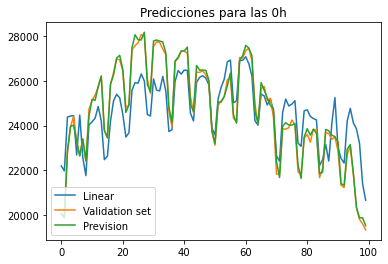

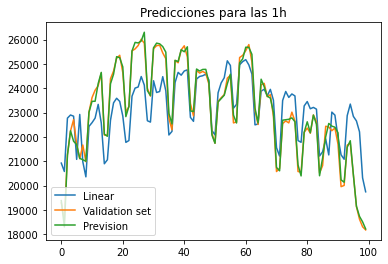

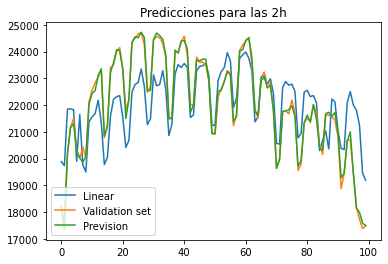

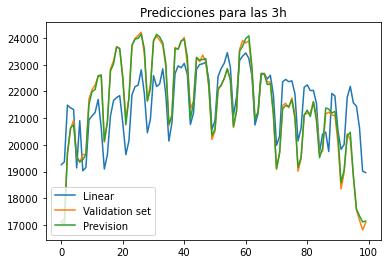

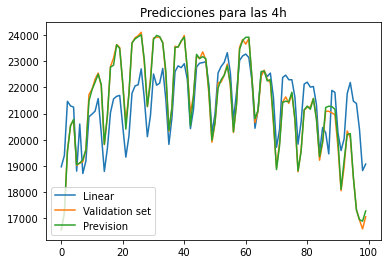

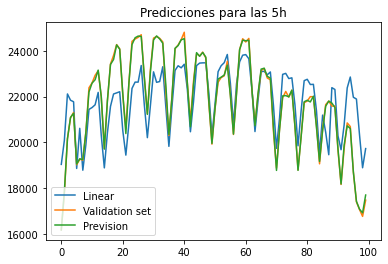

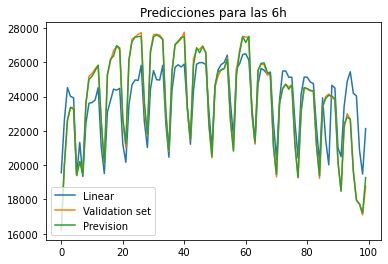

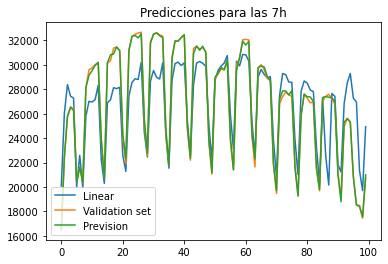

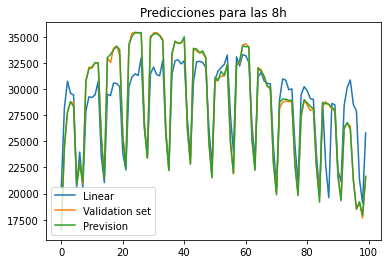

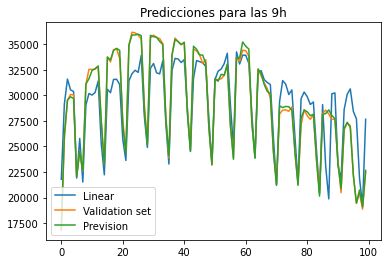

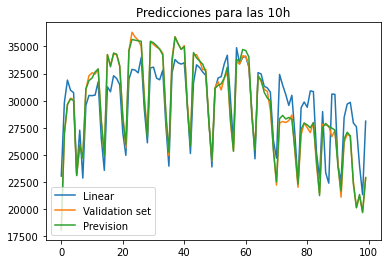

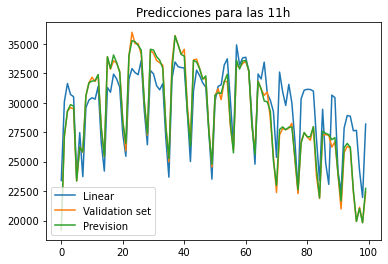

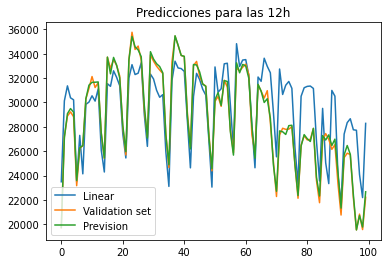

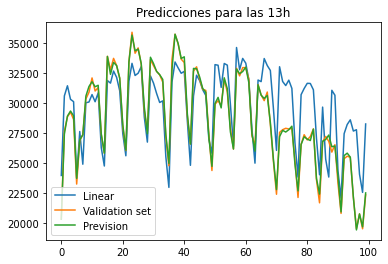

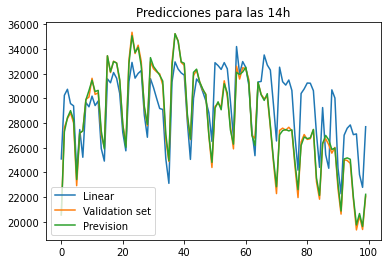

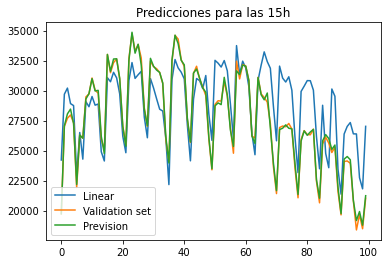

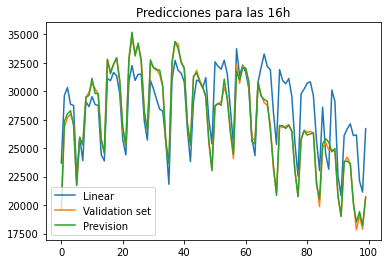

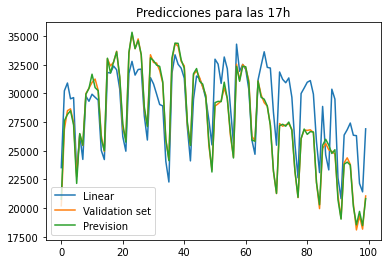

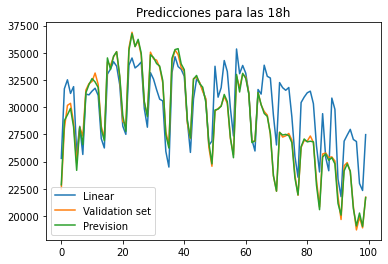

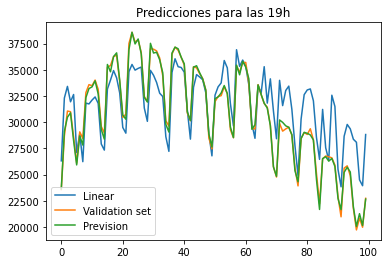

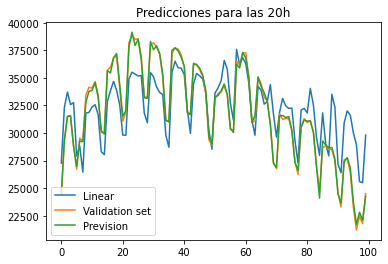

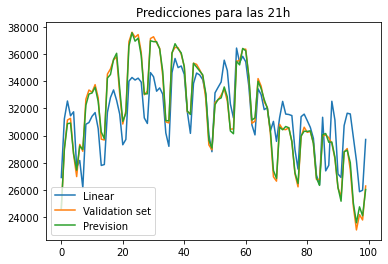

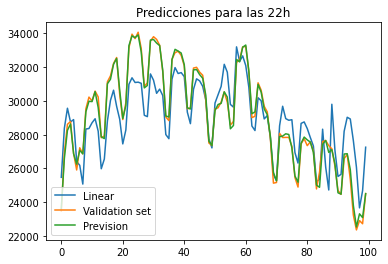

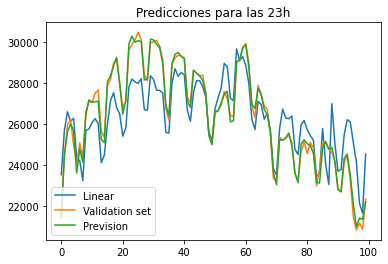

In [22]:
for h in range (24):
    plt.title ('Predicciones para las ' +  str(h) +  'h')
    plt.plot(linear_predictions[h][:100], label = 'Linear')
    plt.plot(y_test[h][:100], label = 'Validation set')
    plt.plot(prevision_test[h][:100], label = 'Prevision')
    plt.legend(loc='lower left')
    plt.show()

## XGBoost

In [27]:
from xgboost.sklearn import XGBRegressor

XGB_models = {}
XGB_predictions = {}

for h in range (24):
    XGB_models[h] = XGBRegressor().fit(x_train[h]+x_val[h], y_train[h]+y_val[h])
    XGB_predictions[h] = XGB_models[h].predict(x_test[h])

In [28]:
df_XGB, XGB_metrics = metrics(XGB_predictions, y_test)
XGB_metrics

[[0, 1266.3779294870951, 1015.3527023236302, 4672.646484375],
 [1, 1227.9190718206148, 993.6229789674655, 4080.7291699999987],
 [2, 1137.1336603548611, 911.025725140411, 4015.2005175000013],
 [3, 1210.0569708006476, 971.802021251713, 3967.890625],
 [4, 1207.7099167950937, 975.4606626678082, 3972.5188768750013],
 [5, 1177.725880923123, 938.4379958253421, 4541.802080000001],
 [6, 1360.2255016410816, 1045.4429990907533, 5702.728515625],
 [7, 1706.8287402070955, 1290.2699165787674, 7821.795576249999],
 [8, 2059.1169654395912, 1552.9098082140404, 10370.479169999999],
 [9, 2153.7959243874798, 1693.8169645496569, 9264.313798750001],
 [10, 2019.2870585992598, 1600.4575627945217, 8381.184248124999],
 [11, 2175.202440116896, 1774.0977007962324, 9787.223955000001],
 [12, 2140.914060554994, 1760.776705130138, 8981.3515625],
 [13, 2346.9780580775055, 1903.4226559760273, 9914.76953125],
 [14, 2210.681831921353, 1794.2129818390379, 9718.360673750001],
 [15, 2148.189958679132, 1667.9161402996572, 9730

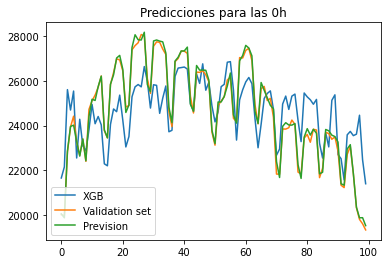

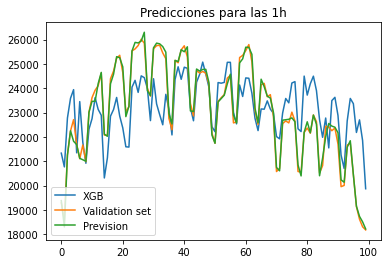

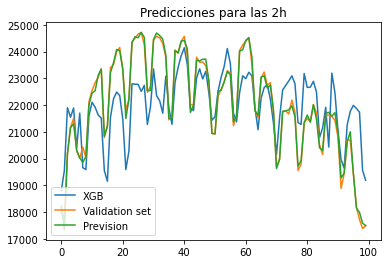

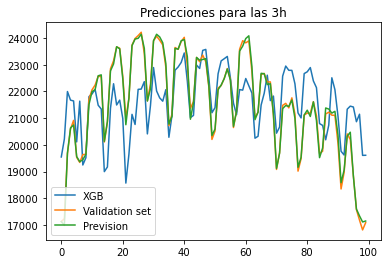

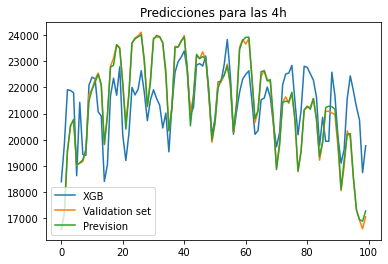

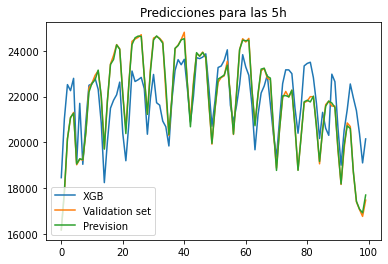

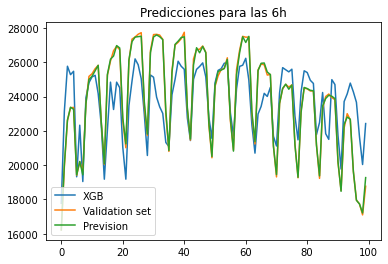

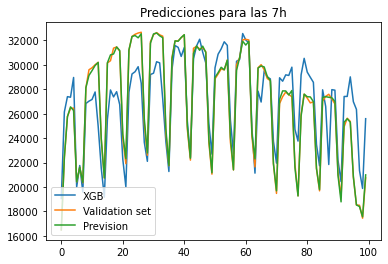

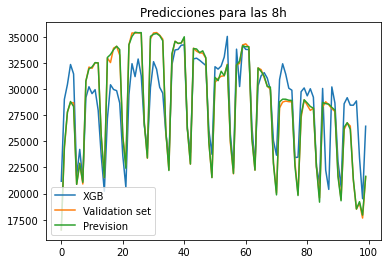

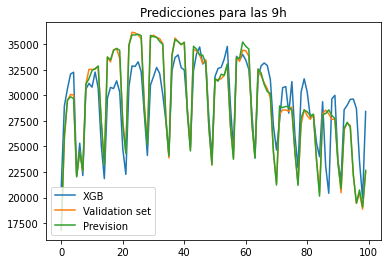

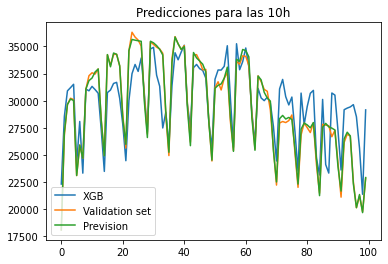

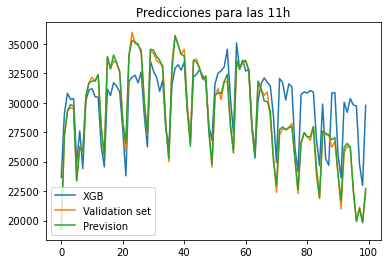

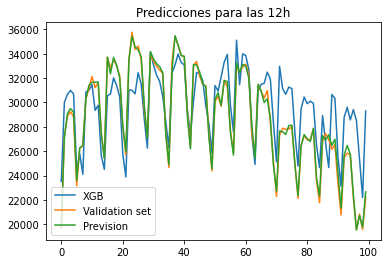

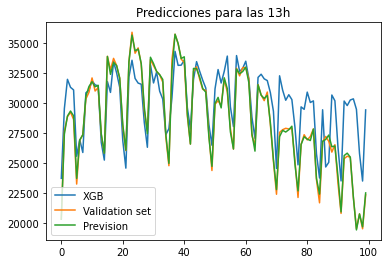

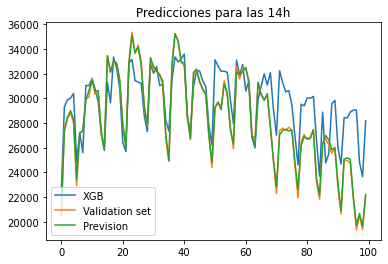

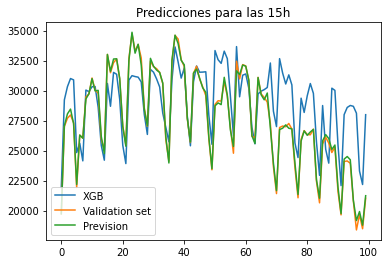

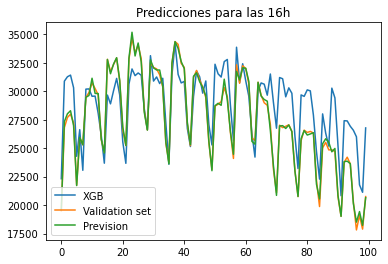

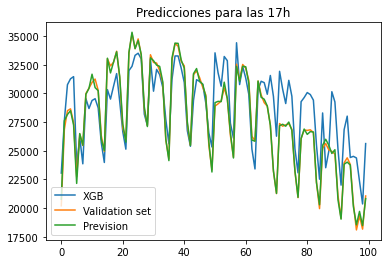

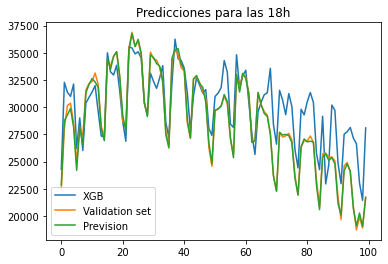

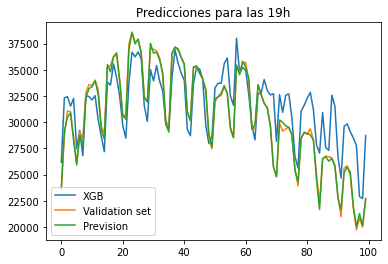

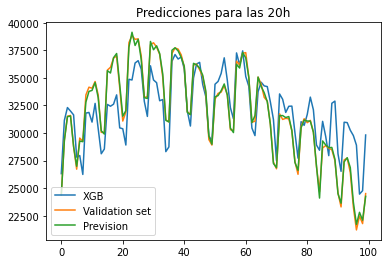

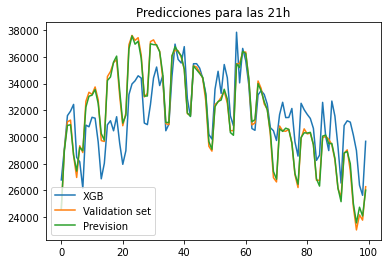

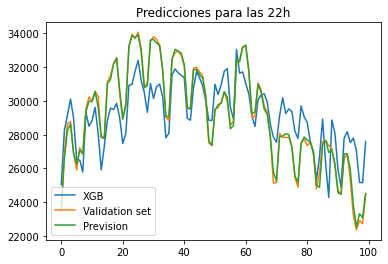

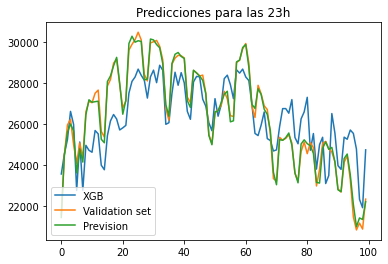

In [29]:
for h in range (24):
    plt.title ('Predicciones para las ' +  str(h) +  'h')
    plt.plot(XGB_predictions[h][:100], label = 'XGB')
    plt.plot(y_test[h][:100], label = 'Validation set')
    plt.plot(prevision_test[h][:100], label = 'Prevision')
    plt.legend(loc='lower left')
    plt.show()

## Regressive Models

In [ ]:
lags = [i for i in range (2,15)]

### Autoregressive

In [ ]:
def predict_ar (model, y_, start, npreds, lags=lags):
    cont = 0
    preds_list = []
    coef = np.array(model.params)
    while cont < npreds:
        
        aux = np.zeros(len(lags))
        
        for i,l in enumerate(lags):
            aux[i] = y_[start+cont-l]

        preds = sum (coef[1:]*aux) + coef[0]

        preds_list.append(preds)

        cont += 1
    
    return preds_list

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

AR_model = {}

for h in range (24):
    AR_model[h] = AutoReg(y_train[h] + y_val[h], lags=lags).fit()
    # print('Coefficients: %s' % AR_model[h].params)

In [ ]:
AR_predictions = {}

for h in range (24):
    AR_predictions[h] = predict_ar (AR_model[h], y[h], len(y_train[h]+y_val[h]), len(y_test[h]))

In [ ]:
df_AR, AR_metrics = metrics(AR_predictions, y_test)
AR_metrics

### LGBM

In [ ]:
def predict (forecaster, y_, start, npreds lags=lags,steps = 24):
    cont = 0
    preds_list = []
    start_window = start-max(lags)
    end_window = start
    while cont < npreds:
        window = pd.Series(y_[start_window:end_window])

        if flag_exog:
            window_exog = exog.loc[cont:cont+steps]
            window_exog = window_exog.reset_index(drop=True, inplace=False)
            window_exog.index = window_exog.index + len(window)
    #         print (window_exog)
            preds = forecaster.predict(steps=steps,last_window=window,exog=window_exog)

        else:
            preds = forecaster.predict(steps=steps,last_window=window)

        preds_list.append(list(preds))

        cont += steps
        start_window += steps
        end_window += steps

    predictions = [item for sublist in preds_list for item in sublist]
    
    return predictions

In [30]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor

forecaster = {}
LGBM_predictions = {}

for h in range (24):

    # Crear el forecaster
    # ==============================================================================
    forecaster[h] = ForecasterAutoreg(
                     regressor = LGBMRegressor(verbose=-1),
                     lags = lags
                 )

    # Entrena el forecaster
    # ==============================================================================
    forecaster[h].fit(y=pd.Series(y_train[h]+y_val[h])
    LGBM_predictions [h] = predict (forecaster[h],  len(y_train[h]+y_val[h]), len(y_test[h]))
    

In [31]:
from skforecast.model_selection import backtesting_forecaster

LGBM_predictions = {}
predicciones = {}

for h in range (24):
    # Backtesting
    # ==============================================================================
    metrica, predicciones[h] = backtesting_forecaster(
                                forecaster         = forecaster[h],
                                y                  = pd.Series(y[h]),
                                steps              = 1,
                                metric             = 'mean_absolute_error',
                                initial_train_size = len(pd.Series(y_train[h]+y_val[h])),
                                refit              = False,
                                n_jobs             = 'auto',
                                verbose            = True,
                                show_progress      = True
                            )
    
    predicciones[h].reset_index(drop=True,inplace=True)
    LGBM_predictions[h] = list(predicciones[h]['pred'])

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3256
Number of observations used for backtesting: 365
    Number of folds: 365
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   0 -- 3255  (n=3256)
    Validation: 3256 -- 3256  (n=1)
Fold: 1
    Training:   0 -- 3255  (n=3256)
    Validation: 3257 -- 3257  (n=1)
Fold: 2
    Training:   0 -- 3255  (n=3256)
    Validation: 3258 -- 3258  (n=1)
Fold: 3
    Training:   0 -- 3255  (n=3256)
    Validation: 3259 -- 3259  (n=1)
Fold: 4
    Training:   0 -- 3255  (n=3256)
    Validation: 3260 -- 3260  (n=1)
Fold: 5
    Training:   0 -- 3255  (n=3256)
    Validation: 3261 -- 3261  (n=1)
Fold: 6
    Training:   0 -- 3255  (n=3256)
    Validation: 3262 -- 3262  (n=1)
Fold: 7
    Training:   0 -- 3255  (n=3256)
    Validation: 3263 -- 3263  (n=1)
Fold: 8
    Training:   0 -- 3255  (n=3256)
 

  0%|          | 0/365 [00:00<?, ?it/s]

In [32]:
df_LGBM, LGBM_metrics = metrics(LGBM_predictions, y_test)
LGBM_metrics

[[0, 1097.490817492651, 798.8172904429617, 5860.1794943711175],
 [1, 977.7483158587022, 693.0599334657138, 5190.751409113869],
 [2, 933.7826615430096, 689.9706588189537, 4236.569474377142],
 [3, 936.7202098588241, 686.6261640932943, 4149.1613995350235],
 [4, 887.9899435752787, 650.9376564156058, 3656.242447071789],
 [5, 940.0280957705105, 684.9554921916284, 3586.0179619764785],
 [6, 1125.5279516317546, 774.2453537852837, 5409.72904012087],
 [7, 1566.5477514142049, 1012.9056718866951, 8762.933704279421],
 [8, 1836.0031469356989, 1141.7045697165559, 11658.078854801304],
 [9, 1879.3685464754562, 1238.3756675169896, 13575.005448197218],
 [10, 1823.049932264552, 1275.3551059822112, 11814.602022741507],
 [11, 1789.8682508373138, 1311.4411480511626, 7914.401792040055],
 [12, 1995.7490717109229, 1474.4018721239597, 8321.840960418096],
 [13, 2112.632945993867, 1536.0393273028706, 9077.450438355827],
 [14, 2178.00351511042, 1553.8710554433799, 8255.528620134286],
 [15, 1984.7995632783466, 1450.2

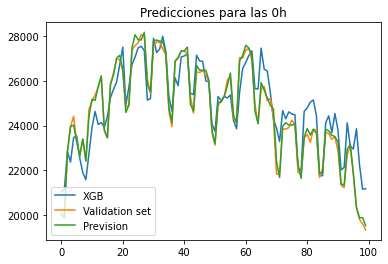

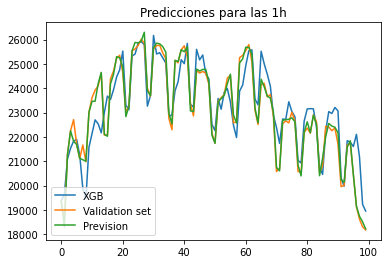

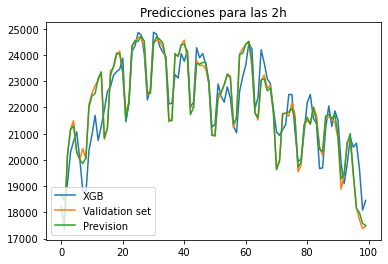

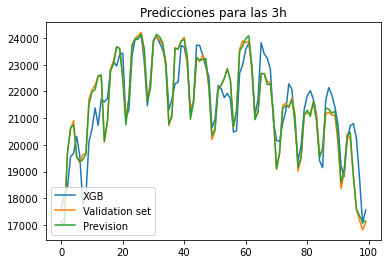

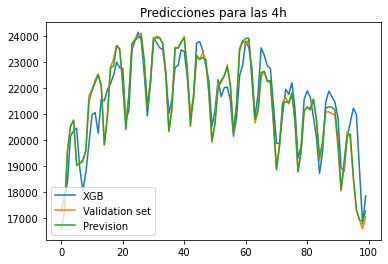

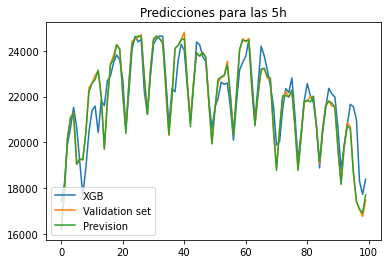

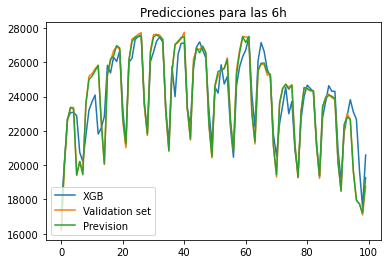

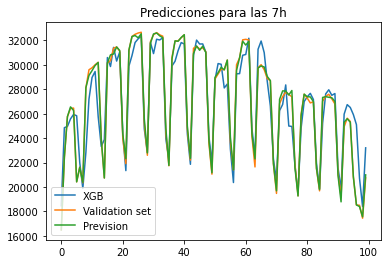

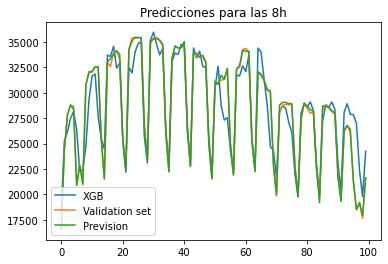

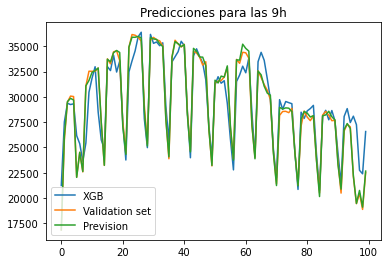

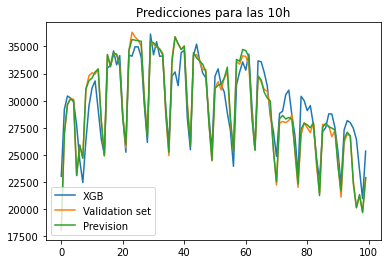

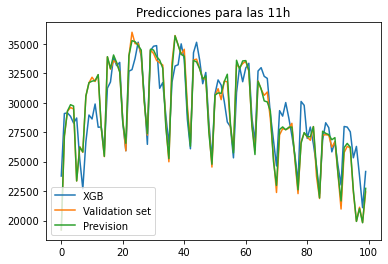

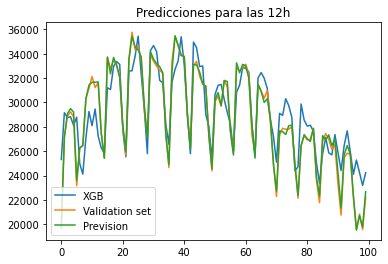

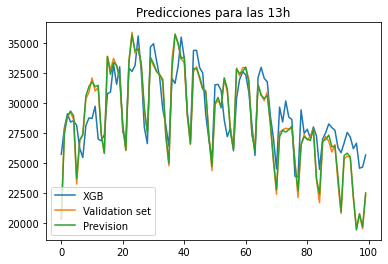

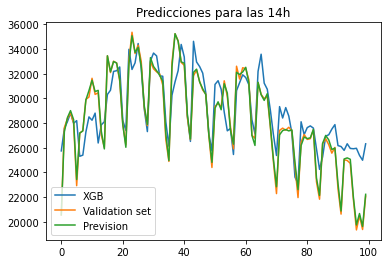

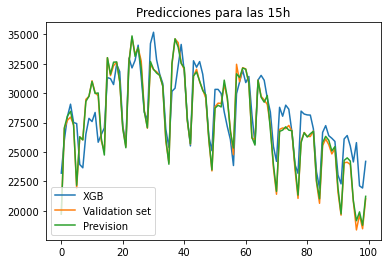

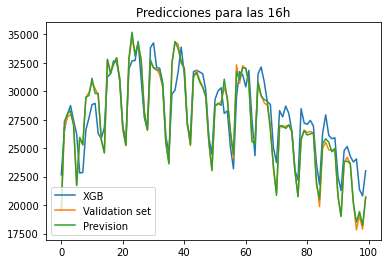

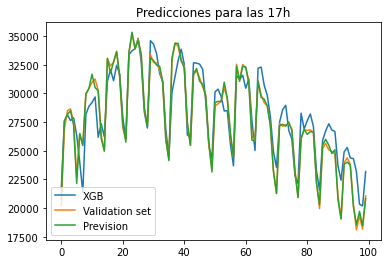

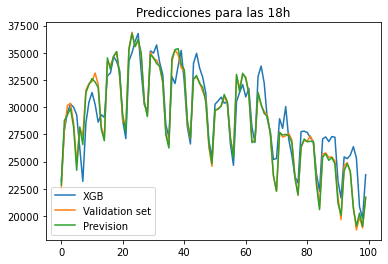

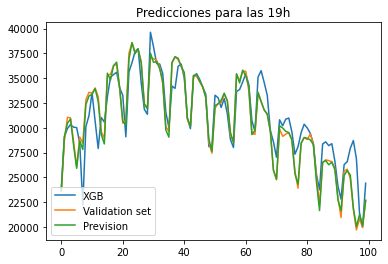

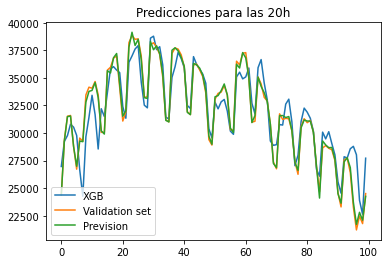

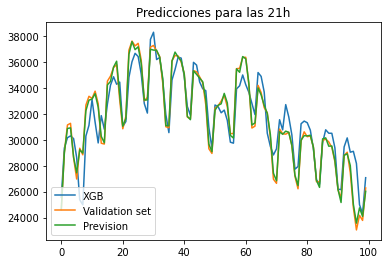

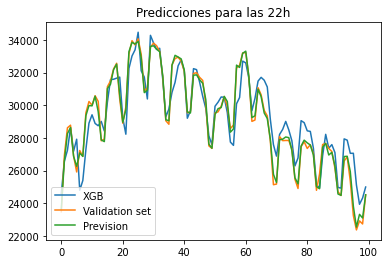

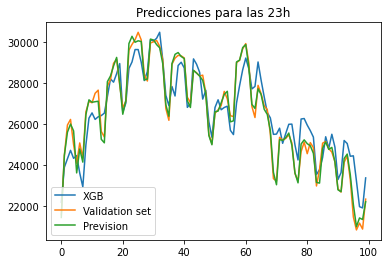

In [33]:
for h in range (24):
    plt.title ('Predicciones para las ' +  str(h) +  'h')
    plt.plot(predicciones[h].values[:100], label = 'XGB')
    plt.plot(y_test[h][:100], label = 'Validation set')
    plt.plot(prevision_test[h][:100], label = 'Prevision')
    plt.legend(loc='lower left')
    plt.show()

## NN

In [34]:
from tensorflow import keras
from keras import layers

input_shape = len(x_train[0][0])
output_shape = 1

models = {}

for h in range (24):

    models[h] = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Dense(16, activation='relu'),
            layers.Dense(8, activation="linear"),
            layers.Dense(output_shape, activation="linear"),
        ]
    )

In [35]:
batch_size = 256
epochs = 2000

from keras import backend as K
from tensorflow.keras.callbacks import Callback

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def mean_absolute_error(y_true, y_pred):
        return (K.mean(abs(y_pred - y_true)))

def maximum_error(y_true, y_pred):
    return (K.max(abs(y_pred - y_true)))

history = {}
NN_predictions ={}

class PrintMetrics(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == (self.params['epochs'] - 1):
            print('Metrics for the last epoch:')
            for key, value in logs.items():
                print(f'{key}: {value}')
            print('\n')


for h in range(24):
    print (h)
#     models[h].compile(loss=root_mean_squared_error, optimizer="adam")
    models[h].compile(loss=mean_absolute_error, optimizer="adam")
    #models[h].compile(loss=maximum_error, optimizer="adam")
    
    x_trainaux = [list(x) for x in x_train[h]]
    x_valaux = [list(x) for x in x_val[h]]
    x_testaux = [list(x) for x in x_test[h]]

#     history[h] = models[h].fit(x_trainaux, y_train[h], validation_data = (x_valaux,y_val[h]), batch_size=batch_size, epochs=epochs, verbose = 0, callbacks=[PrintMetrics()])
    history[h] = models[h].fit(x_trainaux, y_train[h], validation_data = (x_valaux,y_val[h]), batch_size=batch_size, epochs=epochs)
    
    y_new = models[h].predict(x_testaux)
    NN_predictions[h] = [y for sublist in y_new for y in sublist]

0
Epoch 1/200
12/12 [==============================] - 1s 18ms/step - loss: 24424.5723 - val_loss: 22146.8555
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 22463.1094 - val_loss: 20226.6309
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 20399.2188 - val_loss: 18175.8457
Epoch 4/200
12/12 [==============================] - 0s 9ms/step - loss: 18173.4707 - val_loss: 15951.0166
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 15739.8086 - val_loss: 13453.4072
Epoch 6/200
12/12 [==============================] - 0s 11ms/step - loss: 12948.0195 - val_loss: 10546.4580
Epoch 7/200
12/12 [==============================] - 0s 10ms/step - loss: 9684.4922 - val_loss: 7153.2700
Epoch 8/200
12/12 [==============================] - 0s 8ms/step - loss: 5899.0669 - val_loss: 3355.4619
Epoch 9/200
12/12 [==============================] - 0s 7ms/step - loss: 2236.1702 - val_loss: 1996.2279
Epoch 10/200
12/12 [==================

Epoch 155/200
12/12 [==============================] - 0s 5ms/step - loss: 1551.7634 - val_loss: 1684.7819
Epoch 156/200
12/12 [==============================] - 0s 5ms/step - loss: 1551.4265 - val_loss: 1693.2623
Epoch 157/200
12/12 [==============================] - 0s 6ms/step - loss: 1551.9796 - val_loss: 1680.7623
Epoch 158/200
12/12 [==============================] - 0s 6ms/step - loss: 1550.0635 - val_loss: 1689.0033
Epoch 159/200
12/12 [==============================] - 0s 6ms/step - loss: 1549.5227 - val_loss: 1675.4170
Epoch 160/200
12/12 [==============================] - 0s 5ms/step - loss: 1552.8926 - val_loss: 1680.4340
Epoch 161/200
12/12 [==============================] - 0s 6ms/step - loss: 1552.5066 - val_loss: 1674.7257
Epoch 162/200
12/12 [==============================] - 0s 5ms/step - loss: 1558.3464 - val_loss: 1705.6935
Epoch 163/200
12/12 [==============================] - 0s 6ms/step - loss: 1552.9717 - val_loss: 1681.7505
Epoch 164/200
12/12 [================

12/12 [==============================] - 0s 6ms/step - loss: 1455.6970 - val_loss: 1586.1353
Epoch 109/200
12/12 [==============================] - 0s 5ms/step - loss: 1455.3169 - val_loss: 1596.2684
Epoch 110/200
12/12 [==============================] - 0s 7ms/step - loss: 1456.4734 - val_loss: 1584.6168
Epoch 111/200
12/12 [==============================] - 0s 5ms/step - loss: 1455.0490 - val_loss: 1594.5709
Epoch 112/200
12/12 [==============================] - 0s 5ms/step - loss: 1454.2498 - val_loss: 1586.5383
Epoch 113/200
12/12 [==============================] - 0s 5ms/step - loss: 1456.0740 - val_loss: 1598.6500
Epoch 114/200
12/12 [==============================] - 0s 5ms/step - loss: 1457.3344 - val_loss: 1583.9753
Epoch 115/200
12/12 [==============================] - 0s 6ms/step - loss: 1456.6755 - val_loss: 1583.8534
Epoch 116/200
12/12 [==============================] - 0s 5ms/step - loss: 1454.6340 - val_loss: 1597.3813
Epoch 117/200
12/12 [==============================

12/12 [==============================] - 0s 5ms/step - loss: 1395.6010 - val_loss: 1529.6705
Epoch 61/200
12/12 [==============================] - 0s 5ms/step - loss: 1395.3181 - val_loss: 1522.4850
Epoch 62/200
12/12 [==============================] - 0s 5ms/step - loss: 1395.0594 - val_loss: 1534.8726
Epoch 63/200
12/12 [==============================] - 0s 5ms/step - loss: 1398.2858 - val_loss: 1521.7788
Epoch 64/200
12/12 [==============================] - 0s 6ms/step - loss: 1392.3938 - val_loss: 1525.0764
Epoch 65/200
12/12 [==============================] - 0s 5ms/step - loss: 1392.2319 - val_loss: 1521.7596
Epoch 66/200
12/12 [==============================] - 0s 5ms/step - loss: 1394.1007 - val_loss: 1521.2703
Epoch 67/200
12/12 [==============================] - 0s 5ms/step - loss: 1394.6466 - val_loss: 1520.2628
Epoch 68/200
12/12 [==============================] - 0s 6ms/step - loss: 1394.6897 - val_loss: 1533.4480
Epoch 69/200
12/12 [==============================] - 0s 5m

12/12 [==============================] - 0s 5ms/step - loss: 1378.4661 - val_loss: 1508.4017
Epoch 138/200
12/12 [==============================] - 0s 5ms/step - loss: 1379.0179 - val_loss: 1508.1357
Epoch 139/200
12/12 [==============================] - 0s 6ms/step - loss: 1378.9773 - val_loss: 1514.4690
Epoch 140/200
12/12 [==============================] - 0s 5ms/step - loss: 1377.9847 - val_loss: 1504.2642
Epoch 141/200
12/12 [==============================] - 0s 5ms/step - loss: 1377.6165 - val_loss: 1509.5557
Epoch 142/200
12/12 [==============================] - 0s 5ms/step - loss: 1377.6499 - val_loss: 1504.2246
Epoch 143/200
12/12 [==============================] - 0s 5ms/step - loss: 1377.6282 - val_loss: 1503.1390
Epoch 144/200
12/12 [==============================] - 0s 5ms/step - loss: 1377.0166 - val_loss: 1507.7933
Epoch 145/200
12/12 [==============================] - 0s 5ms/step - loss: 1377.2480 - val_loss: 1503.2063
Epoch 146/200
12/12 [==============================

12/12 [==============================] - 0s 6ms/step - loss: 1405.4943 - val_loss: 1521.7789
Epoch 91/200
12/12 [==============================] - 0s 5ms/step - loss: 1406.1757 - val_loss: 1521.6228
Epoch 92/200
12/12 [==============================] - 0s 5ms/step - loss: 1405.2347 - val_loss: 1522.1572
Epoch 93/200
12/12 [==============================] - 0s 5ms/step - loss: 1405.6963 - val_loss: 1522.4047
Epoch 94/200
12/12 [==============================] - 0s 5ms/step - loss: 1405.9387 - val_loss: 1520.6246
Epoch 95/200
12/12 [==============================] - 0s 5ms/step - loss: 1405.6455 - val_loss: 1520.8864
Epoch 96/200
12/12 [==============================] - 0s 5ms/step - loss: 1405.6235 - val_loss: 1521.0254
Epoch 97/200
12/12 [==============================] - 0s 6ms/step - loss: 1407.0236 - val_loss: 1520.7126
Epoch 98/200
12/12 [==============================] - 0s 5ms/step - loss: 1406.9918 - val_loss: 1522.6346
Epoch 99/200
12/12 [==============================] - 0s 6m

Epoch 167/200
12/12 [==============================] - 0s 5ms/step - loss: 1401.3440 - val_loss: 1512.1309
Epoch 168/200
12/12 [==============================] - 0s 5ms/step - loss: 1399.6003 - val_loss: 1513.8716
Epoch 169/200
12/12 [==============================] - 0s 5ms/step - loss: 1397.9221 - val_loss: 1512.8699
Epoch 170/200
12/12 [==============================] - 0s 5ms/step - loss: 1399.5787 - val_loss: 1513.2853
Epoch 171/200
12/12 [==============================] - 0s 5ms/step - loss: 1399.7612 - val_loss: 1512.7019
Epoch 172/200
12/12 [==============================] - 0s 5ms/step - loss: 1401.6953 - val_loss: 1521.9048
Epoch 173/200
12/12 [==============================] - 0s 6ms/step - loss: 1400.4764 - val_loss: 1511.5411
Epoch 174/200
12/12 [==============================] - 0s 5ms/step - loss: 1398.4321 - val_loss: 1518.2874
Epoch 175/200
12/12 [==============================] - 0s 5ms/step - loss: 1397.6647 - val_loss: 1511.6866
Epoch 176/200
12/12 [================

12/12 [==============================] - 0s 5ms/step - loss: 1411.2673 - val_loss: 1521.0647
Epoch 121/200
12/12 [==============================] - 0s 6ms/step - loss: 1410.2485 - val_loss: 1521.6375
Epoch 122/200
12/12 [==============================] - 0s 6ms/step - loss: 1412.1931 - val_loss: 1521.2301
Epoch 123/200
12/12 [==============================] - 0s 5ms/step - loss: 1418.5452 - val_loss: 1520.0647
Epoch 124/200
12/12 [==============================] - 0s 5ms/step - loss: 1415.8495 - val_loss: 1530.7764
Epoch 125/200
12/12 [==============================] - 0s 5ms/step - loss: 1413.9989 - val_loss: 1535.4052
Epoch 126/200
12/12 [==============================] - 0s 5ms/step - loss: 1413.8654 - val_loss: 1519.8539
Epoch 127/200
12/12 [==============================] - 0s 5ms/step - loss: 1409.9586 - val_loss: 1522.3536
Epoch 128/200
12/12 [==============================] - 0s 5ms/step - loss: 1410.0814 - val_loss: 1519.1288
Epoch 129/200
12/12 [==============================

Epoch 73/200
12/12 [==============================] - 0s 5ms/step - loss: 1529.2783 - val_loss: 1638.2206
Epoch 74/200
12/12 [==============================] - 0s 5ms/step - loss: 1530.9376 - val_loss: 1659.3907
Epoch 75/200
12/12 [==============================] - 0s 6ms/step - loss: 1529.2435 - val_loss: 1643.4332
Epoch 76/200
12/12 [==============================] - 0s 5ms/step - loss: 1528.7588 - val_loss: 1640.9242
Epoch 77/200
12/12 [==============================] - 0s 5ms/step - loss: 1525.1851 - val_loss: 1645.3396
Epoch 78/200
12/12 [==============================] - 0s 5ms/step - loss: 1527.3734 - val_loss: 1653.8385
Epoch 79/200
12/12 [==============================] - 0s 5ms/step - loss: 1525.3262 - val_loss: 1642.3771
Epoch 80/200
12/12 [==============================] - 0s 6ms/step - loss: 1525.0892 - val_loss: 1645.5609
Epoch 81/200
12/12 [==============================] - 0s 7ms/step - loss: 1523.9109 - val_loss: 1645.7551
Epoch 82/200
12/12 [==========================

Epoch 150/200
12/12 [==============================] - 0s 7ms/step - loss: 1510.8444 - val_loss: 1622.1973
Epoch 151/200
12/12 [==============================] - 0s 7ms/step - loss: 1510.7802 - val_loss: 1633.8329
Epoch 152/200
12/12 [==============================] - 0s 7ms/step - loss: 1508.9939 - val_loss: 1625.8712
Epoch 153/200
12/12 [==============================] - 0s 7ms/step - loss: 1511.2318 - val_loss: 1620.7012
Epoch 154/200
12/12 [==============================] - 0s 7ms/step - loss: 1510.7264 - val_loss: 1620.2458
Epoch 155/200
12/12 [==============================] - 0s 8ms/step - loss: 1511.5945 - val_loss: 1621.9575
Epoch 156/200
12/12 [==============================] - 0s 7ms/step - loss: 1507.9572 - val_loss: 1638.0076
Epoch 157/200
12/12 [==============================] - 0s 8ms/step - loss: 1510.4435 - val_loss: 1631.8724
Epoch 158/200
12/12 [==============================] - 0s 8ms/step - loss: 1506.0159 - val_loss: 1619.0820
Epoch 159/200
12/12 [================

12/12 [==============================] - 0s 6ms/step - loss: 2124.0615 - val_loss: 2272.6538
Epoch 104/200
12/12 [==============================] - 0s 5ms/step - loss: 2120.8972 - val_loss: 2267.7329
Epoch 105/200
12/12 [==============================] - 0s 5ms/step - loss: 2120.4185 - val_loss: 2268.1313
Epoch 106/200
12/12 [==============================] - 0s 6ms/step - loss: 2125.5881 - val_loss: 2268.8794
Epoch 107/200
12/12 [==============================] - 0s 6ms/step - loss: 2124.7200 - val_loss: 2269.0806
Epoch 108/200
12/12 [==============================] - 0s 5ms/step - loss: 2118.6824 - val_loss: 2266.4729
Epoch 109/200
12/12 [==============================] - 0s 6ms/step - loss: 2119.4595 - val_loss: 2267.0408
Epoch 110/200
12/12 [==============================] - 0s 6ms/step - loss: 2120.0667 - val_loss: 2273.3569
Epoch 111/200
12/12 [==============================] - 0s 6ms/step - loss: 2122.4866 - val_loss: 2266.0869
Epoch 112/200
12/12 [==============================

12/12 [==============================] - 0s 5ms/step - loss: 3352.8206 - val_loss: 3412.3206
Epoch 56/200
12/12 [==============================] - 0s 6ms/step - loss: 3353.2031 - val_loss: 3411.9412
Epoch 57/200
12/12 [==============================] - 0s 5ms/step - loss: 3352.1277 - val_loss: 3412.6797
Epoch 58/200
12/12 [==============================] - 0s 6ms/step - loss: 3351.5635 - val_loss: 3414.4668
Epoch 59/200
12/12 [==============================] - 0s 6ms/step - loss: 3352.7820 - val_loss: 3411.3523
Epoch 60/200
12/12 [==============================] - 0s 5ms/step - loss: 3351.0366 - val_loss: 3410.2288
Epoch 61/200
12/12 [==============================] - 0s 6ms/step - loss: 3351.1360 - val_loss: 3409.2039
Epoch 62/200
12/12 [==============================] - 0s 5ms/step - loss: 3349.2292 - val_loss: 3411.8706
Epoch 63/200
12/12 [==============================] - 0s 6ms/step - loss: 3347.2590 - val_loss: 3408.4363
Epoch 64/200
12/12 [==============================] - 0s 6m

12/12 [==============================] - 0s 5ms/step - loss: 3328.6272 - val_loss: 3387.6172
Epoch 133/200
12/12 [==============================] - 0s 5ms/step - loss: 3327.9412 - val_loss: 3389.5015
Epoch 134/200
12/12 [==============================] - 0s 5ms/step - loss: 3330.0217 - val_loss: 3385.5486
Epoch 135/200
12/12 [==============================] - 0s 6ms/step - loss: 3331.0291 - val_loss: 3394.1287
Epoch 136/200
12/12 [==============================] - 0s 5ms/step - loss: 3331.4895 - val_loss: 3390.2983
Epoch 137/200
12/12 [==============================] - 0s 5ms/step - loss: 3329.3359 - val_loss: 3384.7520
Epoch 138/200
12/12 [==============================] - 0s 5ms/step - loss: 3326.7659 - val_loss: 3387.4436
Epoch 139/200
12/12 [==============================] - 0s 6ms/step - loss: 3325.8921 - val_loss: 3383.7021
Epoch 140/200
12/12 [==============================] - 0s 5ms/step - loss: 3325.5950 - val_loss: 3386.5281
Epoch 141/200
12/12 [==============================

12/12 [==============================] - 0s 5ms/step - loss: 4037.6665 - val_loss: 3914.4832
Epoch 86/200
12/12 [==============================] - 0s 6ms/step - loss: 4039.0581 - val_loss: 3914.9050
Epoch 87/200
12/12 [==============================] - 0s 6ms/step - loss: 4040.4192 - val_loss: 3913.6145
Epoch 88/200
12/12 [==============================] - 0s 5ms/step - loss: 4045.4351 - val_loss: 3913.1226
Epoch 89/200
12/12 [==============================] - 0s 5ms/step - loss: 4038.1433 - val_loss: 3913.3391
Epoch 90/200
12/12 [==============================] - 0s 6ms/step - loss: 4043.2656 - val_loss: 3912.5256
Epoch 91/200
12/12 [==============================] - 0s 5ms/step - loss: 4038.2239 - val_loss: 3913.4976
Epoch 92/200
12/12 [==============================] - 0s 5ms/step - loss: 4034.7944 - val_loss: 3912.3604
Epoch 93/200
12/12 [==============================] - 0s 6ms/step - loss: 4031.0872 - val_loss: 3911.6377
Epoch 94/200
12/12 [==============================] - 0s 5m

Epoch 162/200
12/12 [==============================] - 0s 6ms/step - loss: 4011.6064 - val_loss: 3889.5059
Epoch 163/200
12/12 [==============================] - 0s 5ms/step - loss: 4011.8401 - val_loss: 3889.1819
Epoch 164/200
12/12 [==============================] - 0s 5ms/step - loss: 4011.9827 - val_loss: 3888.7498
Epoch 165/200
12/12 [==============================] - 0s 6ms/step - loss: 4011.9160 - val_loss: 3890.3047
Epoch 166/200
12/12 [==============================] - 0s 5ms/step - loss: 4010.8606 - val_loss: 3888.3955
Epoch 167/200
12/12 [==============================] - 0s 6ms/step - loss: 4011.0000 - val_loss: 3889.3718
Epoch 168/200
12/12 [==============================] - 0s 6ms/step - loss: 4013.9409 - val_loss: 3889.2349
Epoch 169/200
12/12 [==============================] - 0s 6ms/step - loss: 4013.5095 - val_loss: 3887.0908
Epoch 170/200
12/12 [==============================] - 0s 6ms/step - loss: 4015.7251 - val_loss: 3887.6072
Epoch 171/200
12/12 [================

12/12 [==============================] - 0s 7ms/step - loss: 3823.2310 - val_loss: 3644.5828
Epoch 116/200
12/12 [==============================] - 0s 6ms/step - loss: 3824.8557 - val_loss: 3645.3369
Epoch 117/200
12/12 [==============================] - 0s 8ms/step - loss: 3825.3650 - val_loss: 3648.7000
Epoch 118/200
12/12 [==============================] - 0s 7ms/step - loss: 3822.2266 - val_loss: 3644.5305
Epoch 119/200
12/12 [==============================] - 0s 6ms/step - loss: 3820.4114 - val_loss: 3647.7085
Epoch 120/200
12/12 [==============================] - 0s 6ms/step - loss: 3820.2180 - val_loss: 3650.3765
Epoch 121/200
12/12 [==============================] - 0s 6ms/step - loss: 3817.8899 - val_loss: 3647.4275
Epoch 122/200
12/12 [==============================] - 0s 6ms/step - loss: 3819.7815 - val_loss: 3645.3604
Epoch 123/200
12/12 [==============================] - 0s 6ms/step - loss: 3815.7527 - val_loss: 3646.7285
Epoch 124/200
12/12 [==============================

Epoch 68/200
12/12 [==============================] - 0s 6ms/step - loss: 3464.6755 - val_loss: 3342.1838
Epoch 69/200
12/12 [==============================] - 0s 7ms/step - loss: 3467.8123 - val_loss: 3343.0610
Epoch 70/200
12/12 [==============================] - 0s 6ms/step - loss: 3465.1550 - val_loss: 3342.8684
Epoch 71/200
12/12 [==============================] - 0s 5ms/step - loss: 3464.8379 - val_loss: 3341.1528
Epoch 72/200
12/12 [==============================] - 0s 5ms/step - loss: 3461.2620 - val_loss: 3340.2446
Epoch 73/200
12/12 [==============================] - 0s 5ms/step - loss: 3463.8201 - val_loss: 3344.7781
Epoch 74/200
12/12 [==============================] - 0s 5ms/step - loss: 3473.3660 - val_loss: 3340.0662
Epoch 75/200
12/12 [==============================] - 0s 5ms/step - loss: 3459.1252 - val_loss: 3340.7126
Epoch 76/200
12/12 [==============================] - 0s 6ms/step - loss: 3462.6587 - val_loss: 3339.1729
Epoch 77/200
12/12 [==========================

Epoch 145/200
12/12 [==============================] - 0s 5ms/step - loss: 3446.7078 - val_loss: 3333.5615
Epoch 146/200
12/12 [==============================] - 0s 6ms/step - loss: 3443.3928 - val_loss: 3316.6848
Epoch 147/200
12/12 [==============================] - 0s 5ms/step - loss: 3439.4524 - val_loss: 3315.9895
Epoch 148/200
12/12 [==============================] - 0s 5ms/step - loss: 3437.7239 - val_loss: 3323.4841
Epoch 149/200
12/12 [==============================] - 0s 5ms/step - loss: 3449.9202 - val_loss: 3322.1567
Epoch 150/200
12/12 [==============================] - 0s 5ms/step - loss: 3446.5715 - val_loss: 3315.7629
Epoch 151/200
12/12 [==============================] - 0s 6ms/step - loss: 3441.8872 - val_loss: 3314.4968
Epoch 152/200
12/12 [==============================] - 0s 6ms/step - loss: 3439.1545 - val_loss: 3314.2783
Epoch 153/200
12/12 [==============================] - 0s 6ms/step - loss: 3442.0647 - val_loss: 3319.1018
Epoch 154/200
12/12 [================

12/12 [==============================] - 0s 6ms/step - loss: 3247.5186 - val_loss: 3209.2058
Epoch 99/200
12/12 [==============================] - 0s 6ms/step - loss: 3248.0437 - val_loss: 3209.9453
Epoch 100/200
12/12 [==============================] - 0s 6ms/step - loss: 3247.7361 - val_loss: 3205.0247
Epoch 101/200
12/12 [==============================] - 0s 5ms/step - loss: 3248.3242 - val_loss: 3210.2007
Epoch 102/200
12/12 [==============================] - 0s 5ms/step - loss: 3246.4790 - val_loss: 3206.0698
Epoch 103/200
12/12 [==============================] - 0s 5ms/step - loss: 3255.9167 - val_loss: 3221.9089
Epoch 104/200
12/12 [==============================] - 0s 5ms/step - loss: 3251.3428 - val_loss: 3203.0959
Epoch 105/200
12/12 [==============================] - 0s 5ms/step - loss: 3249.2498 - val_loss: 3205.2322
Epoch 106/200
12/12 [==============================] - 0s 6ms/step - loss: 3248.1716 - val_loss: 3206.1843
Epoch 107/200
12/12 [==============================]

12/12 [==============================] - 0s 5ms/step - loss: 3269.7068 - val_loss: 3271.2417
Epoch 51/200
12/12 [==============================] - 0s 6ms/step - loss: 3272.2537 - val_loss: 3271.0088
Epoch 52/200
12/12 [==============================] - 0s 6ms/step - loss: 3269.8110 - val_loss: 3269.4739
Epoch 53/200
12/12 [==============================] - 0s 5ms/step - loss: 3270.6904 - val_loss: 3272.6956
Epoch 54/200
12/12 [==============================] - 0s 5ms/step - loss: 3271.4753 - val_loss: 3268.1372
Epoch 55/200
12/12 [==============================] - 0s 6ms/step - loss: 3275.0432 - val_loss: 3268.7817
Epoch 56/200
12/12 [==============================] - 0s 5ms/step - loss: 3269.1372 - val_loss: 3270.2256
Epoch 57/200
12/12 [==============================] - 0s 5ms/step - loss: 3266.9841 - val_loss: 3268.0959
Epoch 58/200
12/12 [==============================] - 0s 5ms/step - loss: 3266.6375 - val_loss: 3266.4917
Epoch 59/200
12/12 [==============================] - 0s 5m

12/12 [==============================] - 0s 6ms/step - loss: 25615.3340 - val_loss: 21733.6328
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 21228.3652 - val_loss: 17419.6074
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 16512.8340 - val_loss: 12755.8867
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 11412.2715 - val_loss: 7777.3604
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 6174.4917 - val_loss: 3534.4683
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 3356.6931 - val_loss: 3664.3655
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 3468.5776 - val_loss: 3277.7412
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 3223.0632 - val_loss: 3224.0603
Epoch 11/200
12/12 [==============================] - 0s 5ms/step - loss: 3232.3657 - val_loss: 3224.0398
Epoch 12/200
12/12 [==============================] - 0s 5

Epoch 157/200
12/12 [==============================] - 0s 5ms/step - loss: 3162.5115 - val_loss: 3166.1265
Epoch 158/200
12/12 [==============================] - 0s 5ms/step - loss: 3165.9653 - val_loss: 3174.4653
Epoch 159/200
12/12 [==============================] - 0s 6ms/step - loss: 3165.2930 - val_loss: 3162.0984
Epoch 160/200
12/12 [==============================] - 0s 6ms/step - loss: 3178.6182 - val_loss: 3163.1013
Epoch 161/200
12/12 [==============================] - 0s 6ms/step - loss: 3169.4849 - val_loss: 3187.0986
Epoch 162/200
12/12 [==============================] - 0s 5ms/step - loss: 3164.7893 - val_loss: 3173.1726
Epoch 163/200
12/12 [==============================] - 0s 5ms/step - loss: 3161.9126 - val_loss: 3186.3513
Epoch 164/200
12/12 [==============================] - 0s 5ms/step - loss: 3165.7874 - val_loss: 3163.1787
Epoch 165/200
12/12 [==============================] - 0s 5ms/step - loss: 3162.7637 - val_loss: 3203.4575
Epoch 166/200
12/12 [================

12/12 [==============================] - 0s 5ms/step - loss: 2948.0374 - val_loss: 3107.9062
Epoch 34/200
12/12 [==============================] - 0s 5ms/step - loss: 2945.8691 - val_loss: 3105.0610
Epoch 35/200
12/12 [==============================] - 0s 6ms/step - loss: 2946.2529 - val_loss: 3106.5103
Epoch 36/200
12/12 [==============================] - 0s 5ms/step - loss: 2943.0789 - val_loss: 3104.5339
Epoch 37/200
12/12 [==============================] - 0s 6ms/step - loss: 2946.8689 - val_loss: 3105.7058
Epoch 38/200
12/12 [==============================] - 0s 6ms/step - loss: 2947.3442 - val_loss: 3108.0503
Epoch 39/200
12/12 [==============================] - 0s 6ms/step - loss: 2944.9695 - val_loss: 3104.4595
Epoch 40/200
12/12 [==============================] - 0s 6ms/step - loss: 2943.8650 - val_loss: 3105.2712
Epoch 41/200
12/12 [==============================] - 0s 5ms/step - loss: 2946.5898 - val_loss: 3105.4424
Epoch 42/200
12/12 [==============================] - 0s 5m

12/12 [==============================] - 0s 6ms/step - loss: 2924.8757 - val_loss: 3077.7686
Epoch 187/200
12/12 [==============================] - 0s 5ms/step - loss: 2928.0898 - val_loss: 3074.7905
Epoch 188/200
12/12 [==============================] - 0s 6ms/step - loss: 2941.2383 - val_loss: 3094.8418
Epoch 189/200
12/12 [==============================] - 0s 5ms/step - loss: 2939.1143 - val_loss: 3073.6797
Epoch 190/200
12/12 [==============================] - 0s 5ms/step - loss: 2932.1018 - val_loss: 3081.6367
Epoch 191/200
12/12 [==============================] - 0s 5ms/step - loss: 2925.8699 - val_loss: 3081.9551
Epoch 192/200
12/12 [==============================] - 0s 5ms/step - loss: 2929.9338 - val_loss: 3073.4109
Epoch 193/200
12/12 [==============================] - 0s 5ms/step - loss: 2925.2405 - val_loss: 3080.7288
Epoch 194/200
12/12 [==============================] - 0s 5ms/step - loss: 2924.0608 - val_loss: 3080.6672
Epoch 195/200
12/12 [==============================

Epoch 63/200
12/12 [==============================] - 0s 6ms/step - loss: 3114.3535 - val_loss: 3211.3196
Epoch 64/200
12/12 [==============================] - 0s 6ms/step - loss: 3112.4373 - val_loss: 3221.1768
Epoch 65/200
12/12 [==============================] - 0s 5ms/step - loss: 3115.5168 - val_loss: 3210.7664
Epoch 66/200
12/12 [==============================] - 0s 5ms/step - loss: 3111.2405 - val_loss: 3214.9131
Epoch 67/200
12/12 [==============================] - 0s 5ms/step - loss: 3113.9670 - val_loss: 3209.6538
Epoch 68/200
12/12 [==============================] - 0s 6ms/step - loss: 3113.1526 - val_loss: 3213.2642
Epoch 69/200
12/12 [==============================] - 0s 5ms/step - loss: 3114.0779 - val_loss: 3214.4287
Epoch 70/200
12/12 [==============================] - 0s 6ms/step - loss: 3111.6299 - val_loss: 3208.9429
Epoch 71/200
12/12 [==============================] - 0s 6ms/step - loss: 3117.2390 - val_loss: 3224.6821
Epoch 72/200
12/12 [==========================

Epoch 140/200
12/12 [==============================] - 0s 6ms/step - loss: 3091.0928 - val_loss: 3183.4951
Epoch 141/200
12/12 [==============================] - 0s 6ms/step - loss: 3088.7151 - val_loss: 3185.3442
Epoch 142/200
12/12 [==============================] - 0s 5ms/step - loss: 3084.5310 - val_loss: 3181.3726
Epoch 143/200
12/12 [==============================] - 0s 6ms/step - loss: 3090.2300 - val_loss: 3200.1545
Epoch 144/200
12/12 [==============================] - 0s 5ms/step - loss: 3088.9294 - val_loss: 3180.2617
Epoch 145/200
12/12 [==============================] - 0s 6ms/step - loss: 3087.3577 - val_loss: 3180.0862
Epoch 146/200
12/12 [==============================] - 0s 6ms/step - loss: 3083.5293 - val_loss: 3191.5759
Epoch 147/200
12/12 [==============================] - 0s 5ms/step - loss: 3087.0657 - val_loss: 3180.7842
Epoch 148/200
12/12 [==============================] - 0s 5ms/step - loss: 3085.0417 - val_loss: 3180.7148
Epoch 149/200
12/12 [================

12/12 [==============================] - 0s 7ms/step - loss: 3320.5098 - val_loss: 3311.4912
Epoch 17/200
12/12 [==============================] - 0s 6ms/step - loss: 3315.2664 - val_loss: 3309.6360
Epoch 18/200
12/12 [==============================] - 0s 7ms/step - loss: 3309.5977 - val_loss: 3312.5754
Epoch 19/200
12/12 [==============================] - 0s 6ms/step - loss: 3309.6714 - val_loss: 3309.3896
Epoch 20/200
12/12 [==============================] - 0s 5ms/step - loss: 3308.7163 - val_loss: 3307.1760
Epoch 21/200
12/12 [==============================] - 0s 6ms/step - loss: 3309.3301 - val_loss: 3307.3931
Epoch 22/200
12/12 [==============================] - 0s 5ms/step - loss: 3309.4243 - val_loss: 3307.3901
Epoch 23/200
12/12 [==============================] - 0s 6ms/step - loss: 3307.9561 - val_loss: 3308.3572
Epoch 24/200
12/12 [==============================] - 0s 6ms/step - loss: 3308.5037 - val_loss: 3306.7354
Epoch 25/200
12/12 [==============================] - 0s 6m

Epoch 170/200
12/12 [==============================] - 0s 5ms/step - loss: 3279.2258 - val_loss: 3273.2312
Epoch 171/200
12/12 [==============================] - 0s 6ms/step - loss: 3279.9795 - val_loss: 3272.5686
Epoch 172/200
12/12 [==============================] - 0s 5ms/step - loss: 3279.3384 - val_loss: 3284.4016
Epoch 173/200
12/12 [==============================] - 0s 5ms/step - loss: 3279.4731 - val_loss: 3271.9004
Epoch 174/200
12/12 [==============================] - 0s 5ms/step - loss: 3276.5488 - val_loss: 3281.6602
Epoch 175/200
12/12 [==============================] - 0s 6ms/step - loss: 3278.3975 - val_loss: 3270.5308
Epoch 176/200
12/12 [==============================] - 0s 6ms/step - loss: 3276.3770 - val_loss: 3283.5554
Epoch 177/200
12/12 [==============================] - 0s 5ms/step - loss: 3280.9045 - val_loss: 3270.0181
Epoch 178/200
12/12 [==============================] - 0s 5ms/step - loss: 3278.1726 - val_loss: 3284.1975
Epoch 179/200
12/12 [================

12/12 [==============================] - 0s 6ms/step - loss: 3358.4558 - val_loss: 3241.2175
Epoch 124/200
12/12 [==============================] - 0s 6ms/step - loss: 3358.8066 - val_loss: 3238.1294
Epoch 125/200
12/12 [==============================] - 0s 5ms/step - loss: 3357.2922 - val_loss: 3240.3528
Epoch 126/200
12/12 [==============================] - 0s 5ms/step - loss: 3356.7761 - val_loss: 3238.4543
Epoch 127/200
12/12 [==============================] - 0s 5ms/step - loss: 3357.5835 - val_loss: 3237.6887
Epoch 128/200
12/12 [==============================] - 0s 6ms/step - loss: 3355.5923 - val_loss: 3237.2622
Epoch 129/200
12/12 [==============================] - 0s 5ms/step - loss: 3363.3567 - val_loss: 3272.3914
Epoch 130/200
12/12 [==============================] - 0s 7ms/step - loss: 3371.9255 - val_loss: 3274.8545
Epoch 131/200
12/12 [==============================] - 0s 5ms/step - loss: 3371.9197 - val_loss: 3245.2134
Epoch 132/200
12/12 [==============================

Epoch 76/200
12/12 [==============================] - 0s 5ms/step - loss: 3272.4272 - val_loss: 3043.7888
Epoch 77/200
12/12 [==============================] - 0s 6ms/step - loss: 3272.7585 - val_loss: 3046.8418
Epoch 78/200
12/12 [==============================] - 0s 6ms/step - loss: 3269.8506 - val_loss: 3046.0034
Epoch 79/200
12/12 [==============================] - 0s 5ms/step - loss: 3271.5625 - val_loss: 3046.2073
Epoch 80/200
12/12 [==============================] - 0s 5ms/step - loss: 3271.0308 - val_loss: 3043.2576
Epoch 81/200
12/12 [==============================] - 0s 5ms/step - loss: 3270.9766 - val_loss: 3045.3044
Epoch 82/200
12/12 [==============================] - 0s 5ms/step - loss: 3270.8472 - val_loss: 3042.8540
Epoch 83/200
12/12 [==============================] - 0s 5ms/step - loss: 3270.9543 - val_loss: 3045.8137
Epoch 84/200
12/12 [==============================] - 0s 5ms/step - loss: 3268.3884 - val_loss: 3042.6941
Epoch 85/200
12/12 [==========================

Epoch 153/200
12/12 [==============================] - 0s 6ms/step - loss: 3248.7952 - val_loss: 3018.1592
Epoch 154/200
12/12 [==============================] - 0s 5ms/step - loss: 3249.8296 - val_loss: 3016.2651
Epoch 155/200
12/12 [==============================] - 0s 5ms/step - loss: 3257.0288 - val_loss: 3046.9397
Epoch 156/200
12/12 [==============================] - 0s 6ms/step - loss: 3254.2297 - val_loss: 3032.8086
Epoch 157/200
12/12 [==============================] - 0s 5ms/step - loss: 3257.8022 - val_loss: 3014.9097
Epoch 158/200
12/12 [==============================] - 0s 5ms/step - loss: 3245.7502 - val_loss: 3016.2859
Epoch 159/200
12/12 [==============================] - 0s 5ms/step - loss: 3242.9941 - val_loss: 3036.7026
Epoch 160/200
12/12 [==============================] - 0s 5ms/step - loss: 3252.2498 - val_loss: 3014.3545
Epoch 161/200
12/12 [==============================] - 0s 7ms/step - loss: 3243.9250 - val_loss: 3016.2305
Epoch 162/200
12/12 [================

12/12 [==============================] - 0s 6ms/step - loss: 3128.2988 - val_loss: 2902.0671
Epoch 107/200
12/12 [==============================] - 0s 7ms/step - loss: 3125.9097 - val_loss: 2898.7356
Epoch 108/200
12/12 [==============================] - 0s 7ms/step - loss: 3129.8093 - val_loss: 2907.4980
Epoch 109/200
12/12 [==============================] - 0s 7ms/step - loss: 3130.0334 - val_loss: 2901.6863
Epoch 110/200
12/12 [==============================] - 0s 6ms/step - loss: 3129.1277 - val_loss: 2898.3555
Epoch 111/200
12/12 [==============================] - 0s 5ms/step - loss: 3123.2993 - val_loss: 2904.4438
Epoch 112/200
12/12 [==============================] - 0s 6ms/step - loss: 3125.3259 - val_loss: 2897.6919
Epoch 113/200
12/12 [==============================] - 0s 8ms/step - loss: 3127.3918 - val_loss: 2897.4517
Epoch 114/200
12/12 [==============================] - 0s 6ms/step - loss: 3121.8606 - val_loss: 2903.6235
Epoch 115/200
12/12 [==============================

12/12 [==============================] - 0s 6ms/step - loss: 2889.6921 - val_loss: 2740.2764
Epoch 59/200
12/12 [==============================] - 0s 5ms/step - loss: 2888.0732 - val_loss: 2740.3540
Epoch 60/200
12/12 [==============================] - 0s 5ms/step - loss: 2893.4692 - val_loss: 2740.0693
Epoch 61/200
12/12 [==============================] - 0s 6ms/step - loss: 2891.3850 - val_loss: 2739.6497
Epoch 62/200
12/12 [==============================] - 0s 6ms/step - loss: 2892.8262 - val_loss: 2739.3701
Epoch 63/200
12/12 [==============================] - 0s 5ms/step - loss: 2890.5820 - val_loss: 2739.1218
Epoch 64/200
12/12 [==============================] - 0s 5ms/step - loss: 2888.2910 - val_loss: 2739.1511
Epoch 65/200
12/12 [==============================] - 0s 6ms/step - loss: 2889.4534 - val_loss: 2738.6697
Epoch 66/200
12/12 [==============================] - 0s 5ms/step - loss: 2891.1064 - val_loss: 2738.5503
Epoch 67/200
12/12 [==============================] - 0s 5m

12/12 [==============================] - 0s 5ms/step - loss: 2875.0864 - val_loss: 2722.6975
Epoch 136/200
12/12 [==============================] - 0s 5ms/step - loss: 2875.1167 - val_loss: 2725.1814
Epoch 137/200
12/12 [==============================] - 0s 5ms/step - loss: 2871.9048 - val_loss: 2726.6116
Epoch 138/200
12/12 [==============================] - 0s 5ms/step - loss: 2876.5637 - val_loss: 2722.3914
Epoch 139/200
12/12 [==============================] - 0s 6ms/step - loss: 2871.2876 - val_loss: 2722.0449
Epoch 140/200
12/12 [==============================] - 0s 6ms/step - loss: 2871.8149 - val_loss: 2723.2935
Epoch 141/200
12/12 [==============================] - 0s 6ms/step - loss: 2875.7495 - val_loss: 2730.3564
Epoch 142/200
12/12 [==============================] - 0s 6ms/step - loss: 2873.1272 - val_loss: 2723.3855
Epoch 143/200
12/12 [==============================] - 0s 5ms/step - loss: 2872.9001 - val_loss: 2721.8323
Epoch 144/200
12/12 [==============================

12/12 [==============================] - 0s 6ms/step - loss: 2455.2812 - val_loss: 2404.3113
Epoch 89/200
12/12 [==============================] - 0s 7ms/step - loss: 2453.6277 - val_loss: 2396.9717
Epoch 90/200
12/12 [==============================] - 0s 5ms/step - loss: 2462.4814 - val_loss: 2409.9233
Epoch 91/200
12/12 [==============================] - 0s 5ms/step - loss: 2456.9014 - val_loss: 2400.6250
Epoch 92/200
12/12 [==============================] - 0s 5ms/step - loss: 2456.7529 - val_loss: 2392.1047
Epoch 93/200
12/12 [==============================] - 0s 5ms/step - loss: 2458.0020 - val_loss: 2414.5759
Epoch 94/200
12/12 [==============================] - 0s 5ms/step - loss: 2461.9292 - val_loss: 2389.8965
Epoch 95/200
12/12 [==============================] - 0s 7ms/step - loss: 2460.8801 - val_loss: 2392.1558
Epoch 96/200
12/12 [==============================] - 0s 6ms/step - loss: 2457.6230 - val_loss: 2409.3582
Epoch 97/200
12/12 [==============================] - 0s 5m

Epoch 165/200
12/12 [==============================] - 0s 6ms/step - loss: 2441.4897 - val_loss: 2379.3059
Epoch 166/200
12/12 [==============================] - 0s 6ms/step - loss: 2438.0193 - val_loss: 2387.6187
Epoch 167/200
12/12 [==============================] - 0s 5ms/step - loss: 2436.2612 - val_loss: 2392.7800
Epoch 168/200
12/12 [==============================] - 0s 5ms/step - loss: 2436.1841 - val_loss: 2386.5664
Epoch 169/200
12/12 [==============================] - 0s 6ms/step - loss: 2439.6360 - val_loss: 2369.5146
Epoch 170/200
12/12 [==============================] - 0s 6ms/step - loss: 2443.0427 - val_loss: 2373.5024
Epoch 171/200
12/12 [==============================] - 0s 5ms/step - loss: 2437.2131 - val_loss: 2397.4639
Epoch 172/200
12/12 [==============================] - 0s 5ms/step - loss: 2436.9272 - val_loss: 2394.8838
Epoch 173/200
12/12 [==============================] - 0s 5ms/step - loss: 2434.1230 - val_loss: 2370.5273
Epoch 174/200
12/12 [================

12/12 [==============================] - 0s 6ms/step - loss: 1994.0906 - val_loss: 2014.8433
Epoch 119/200
12/12 [==============================] - 0s 7ms/step - loss: 2006.3202 - val_loss: 2085.2974
Epoch 120/200
12/12 [==============================] - 0s 6ms/step - loss: 1997.9121 - val_loss: 2023.8988
Epoch 121/200
12/12 [==============================] - 0s 6ms/step - loss: 1992.5470 - val_loss: 2042.0587
Epoch 122/200
12/12 [==============================] - 0s 6ms/step - loss: 1994.2058 - val_loss: 2017.2433
Epoch 123/200
12/12 [==============================] - 0s 6ms/step - loss: 1993.8843 - val_loss: 2029.2832
Epoch 124/200
12/12 [==============================] - 0s 5ms/step - loss: 1992.8494 - val_loss: 2050.5215
Epoch 125/200
12/12 [==============================] - 0s 6ms/step - loss: 1995.8751 - val_loss: 2027.8992
Epoch 126/200
12/12 [==============================] - 0s 6ms/step - loss: 1994.7086 - val_loss: 2012.8640
Epoch 127/200
12/12 [==============================

Epoch 71/200
12/12 [==============================] - 0s 6ms/step - loss: 1689.1520 - val_loss: 1761.6041
Epoch 72/200
12/12 [==============================] - 0s 6ms/step - loss: 1690.7423 - val_loss: 1766.0305
Epoch 73/200
12/12 [==============================] - 0s 6ms/step - loss: 1692.8274 - val_loss: 1772.6199
Epoch 74/200
12/12 [==============================] - 0s 6ms/step - loss: 1698.5850 - val_loss: 1757.0425
Epoch 75/200
12/12 [==============================] - 0s 5ms/step - loss: 1692.9614 - val_loss: 1772.7544
Epoch 76/200
12/12 [==============================] - 0s 5ms/step - loss: 1693.2631 - val_loss: 1756.8865
Epoch 77/200
12/12 [==============================] - 0s 5ms/step - loss: 1696.7858 - val_loss: 1780.6523
Epoch 78/200
12/12 [==============================] - 0s 6ms/step - loss: 1691.2867 - val_loss: 1763.0038
Epoch 79/200
12/12 [==============================] - 0s 6ms/step - loss: 1689.2979 - val_loss: 1770.8456
Epoch 80/200
12/12 [==========================

Epoch 148/200
12/12 [==============================] - 0s 5ms/step - loss: 1684.0111 - val_loss: 1773.2083
Epoch 149/200
12/12 [==============================] - 0s 6ms/step - loss: 1683.7776 - val_loss: 1748.4904
Epoch 150/200
12/12 [==============================] - 0s 5ms/step - loss: 1679.2902 - val_loss: 1752.9022
Epoch 151/200
12/12 [==============================] - 0s 5ms/step - loss: 1678.6597 - val_loss: 1751.0626
Epoch 152/200
12/12 [==============================] - 0s 6ms/step - loss: 1681.4635 - val_loss: 1754.4276
Epoch 153/200
12/12 [==============================] - 0s 5ms/step - loss: 1680.9646 - val_loss: 1758.5807
Epoch 154/200
12/12 [==============================] - 0s 5ms/step - loss: 1680.6302 - val_loss: 1768.0494
Epoch 155/200
12/12 [==============================] - 0s 5ms/step - loss: 1678.9137 - val_loss: 1755.9692
Epoch 156/200
12/12 [==============================] - 0s 5ms/step - loss: 1679.2693 - val_loss: 1752.5599
Epoch 157/200
12/12 [================

In [36]:
df_NN, NN_metrics = metrics(NN_predictions, y_test)
NN_metrics

[[0, 1768.9104498478246, 1429.678497642123, 4748.609375],
 [1, 1638.230795342326, 1323.128843803082, 4305.461591874999],
 [2, 1553.310612274254, 1250.7573034280824, 3894.3958300000013],
 [3, 1552.8755758172144, 1242.9576521335619, 4052.4596387499987],
 [4, 1541.1629590818484, 1228.608743304794, 3928.8880175000013],
 [5, 1635.7214472458088, 1303.2164774691778, 4177.501953125],
 [6, 2308.7484689041435, 1899.1429919195202, 5807.4928418750005],
 [7, 3465.2442411527413, 2910.0025880770554, 8699.078125],
 [8, 3954.452383395453, 3334.325169467465, 10015.96875],
 [9, 3637.782283638215, 3039.0571578270547, 10626.249345625001],
 [10, 3289.395193185542, 2724.975246010275, 9985.436201249999],
 [11, 3149.478534467413, 2626.0398062106183, 8769.054033125001],
 [12, 3184.3946372140085, 2614.908286893837, 8587.143876875001],
 [13, 3118.274592777092, 2556.096402125, 8099.447265625],
 [14, 3074.606787965321, 2527.0394390839024, 7476.609375],
 [15, 3178.446576395709, 2625.434883292807, 8061.094404374999],

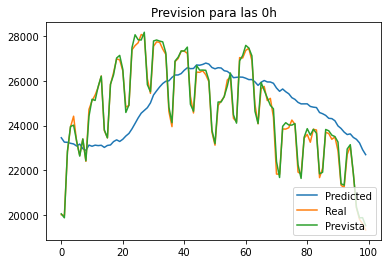

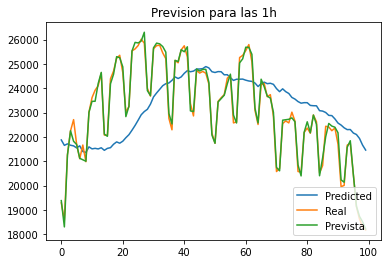

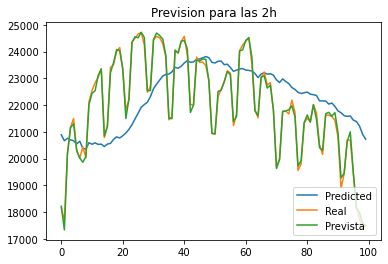

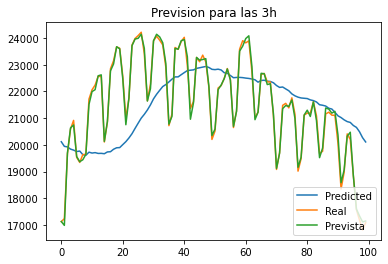

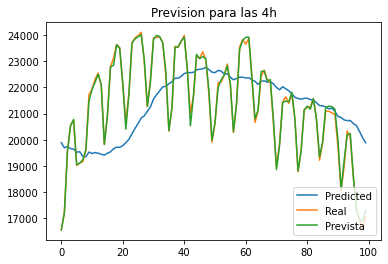

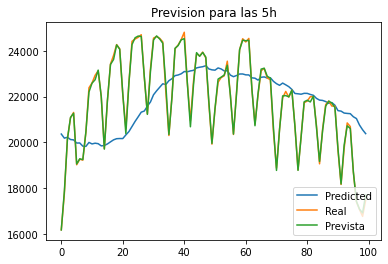

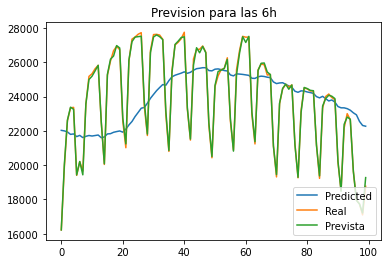

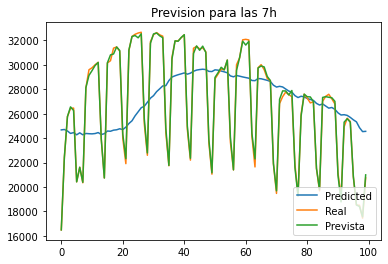

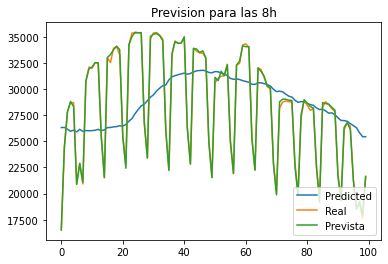

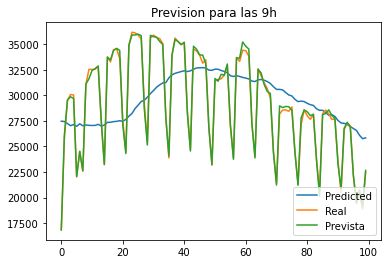

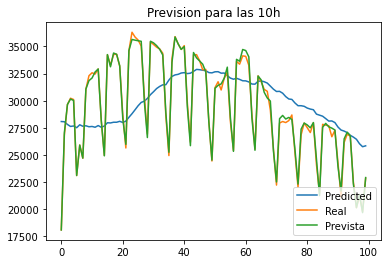

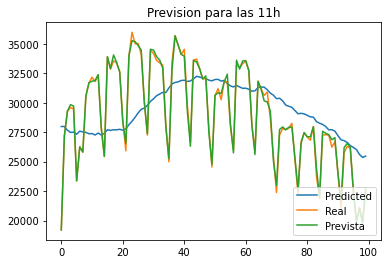

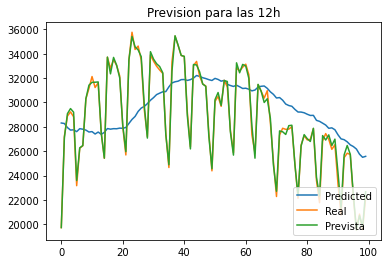

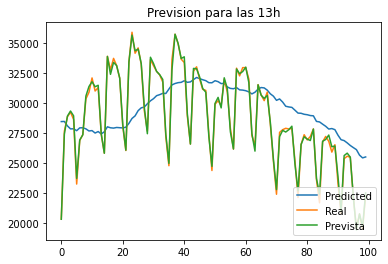

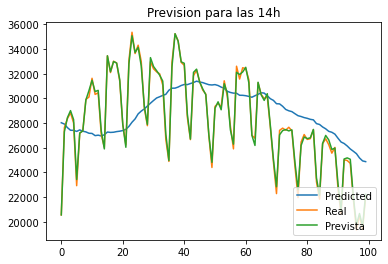

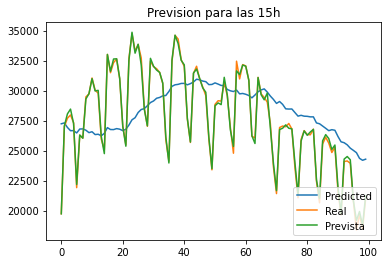

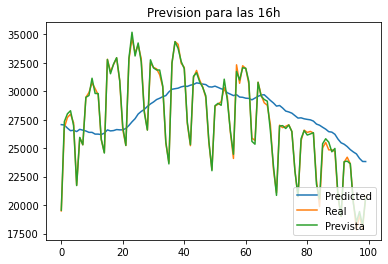

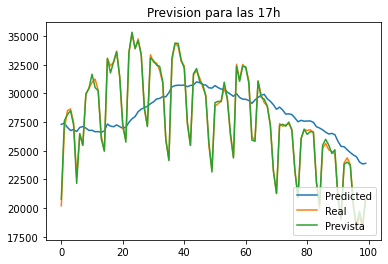

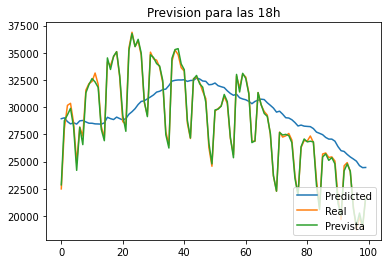

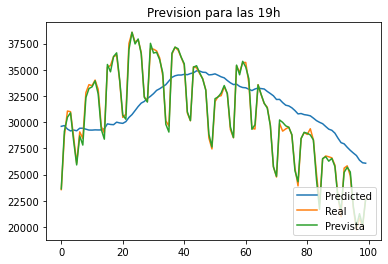

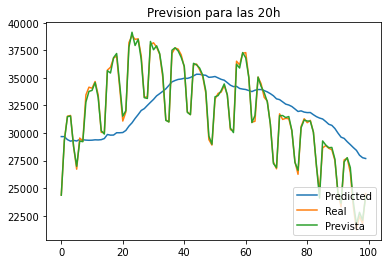

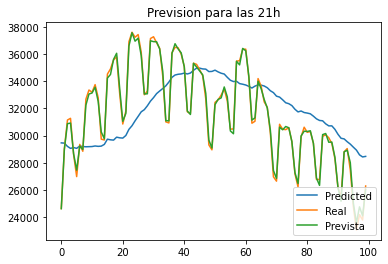

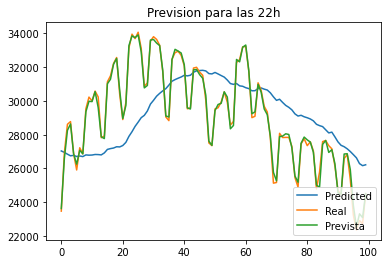

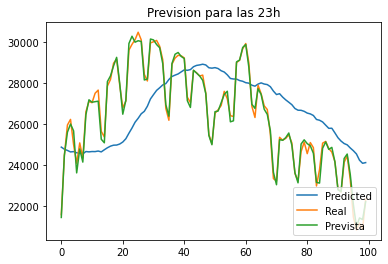

In [37]:
for h in range (24):
    plt.title ('Prevision para las ' + str(h) + 'h')
    plt.plot(NN_predictions[h][:100], label='Predicted')
    plt.plot(y_test[h][:100], label='Real')
    plt.plot(prevision_test[h][:100], label ='Prevista')
    plt.legend(loc='lower right')
    plt.show()

## Error Analysis

In [38]:
df_errors = {}
df_errors ['Linear'] = df_linear
df_errors ['SVR'] = df_SVR
df_errors ['XGBoost'] = df_XGB
df_errors ['LGBM'] = df_LGBM
df_errors ['NN'] = df_NN

### Overall errors 

In [39]:
def hourly_error (type_of_error):
    errors_horas = {name:[] for name in df_errors.keys()}
    for name in errors_horas.keys():
        for i in range (24):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour == i]
            if type_of_error == 'RMSE':
                errors_horas[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_horas[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_horas[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_horas[name].append(max(auxdf['Relative Error']))
            
    errors_horas = pd.DataFrame (errors_horas)
    plt.title(type_of_error + ' for different models')
    plt.xlabel('Hour')
    plt.plot(errors_horas, label=errors_horas.columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()
    return errors_horas

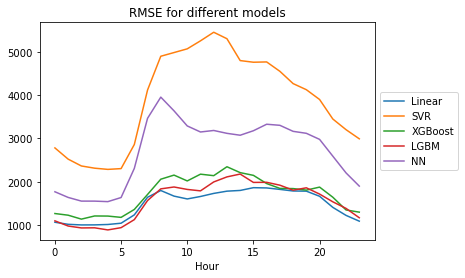

In [40]:
errors_horas_rmse = hourly_error ('RMSE')

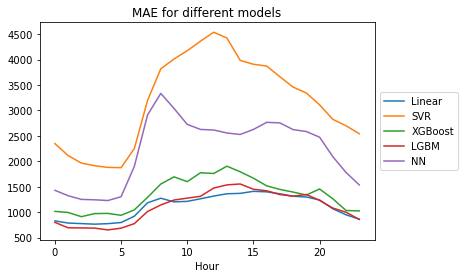

In [41]:
errors_horas_mae = hourly_error ('MAE')

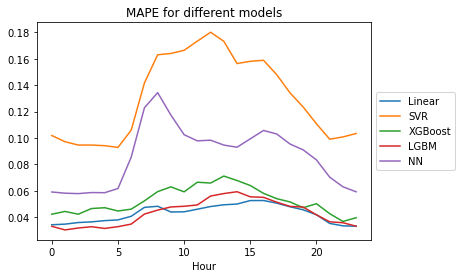

In [42]:
errors_horas_mape = hourly_error ('MAPE')

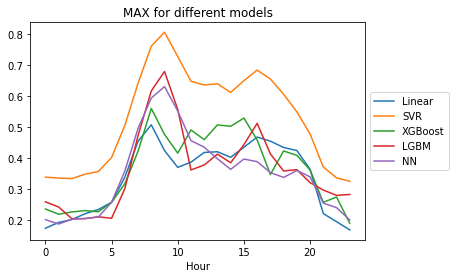

In [43]:
errors_horas_max = hourly_error ('MAX')

In [44]:
def weekly_error(type_of_error):
    errors_weekly = {name: [] for name in df_errors.keys()}
    for name in errors_weekly.keys():
        for i in range(7):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.weekday == i]
            if type_of_error == 'RMSE':
                errors_weekly[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_weekly[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_weekly[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_weekly[name].append(max(auxdf['Absolute Error']))

    # Plot each set of errors separately
    for name, errors in errors_weekly.items():
        plt.plot(range(7), errors, label=name)  # Assuming 0-6 corresponds to Monday-Sunday
        
    plt.title(type_of_error + ' for different models')
    plt.xlabel('Day of the week')
    plt.xticks(range(7), ['L', 'M', 'X', 'J', 'V', 'S', 'D'])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    errors_weekly = pd.DataFrame(errors_weekly)
    return errors_weekly

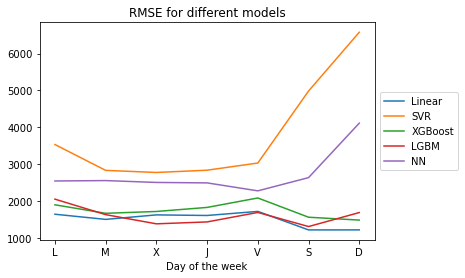

In [45]:
errors_weekly_rmse = weekly_error ('RMSE')

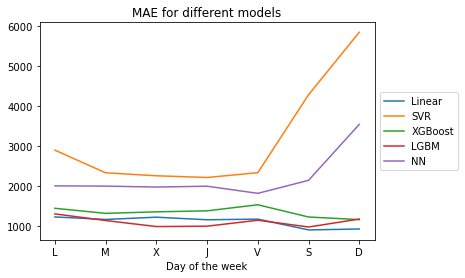

In [46]:
errors_weekly_mae = weekly_error ('MAE')

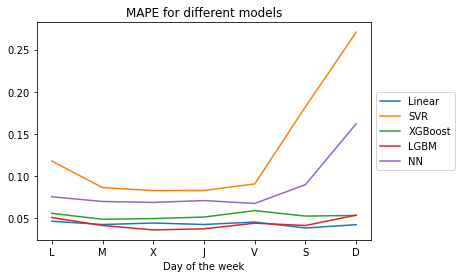

In [47]:
errors_weekly_mape = weekly_error ('MAPE')

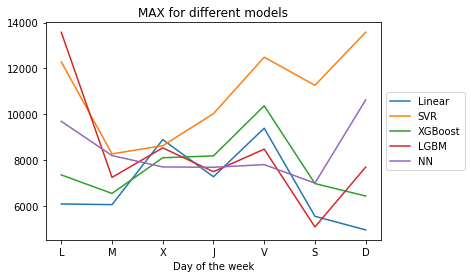

In [48]:
errors_weekly_max = weekly_error ('MAX')

## Histograms

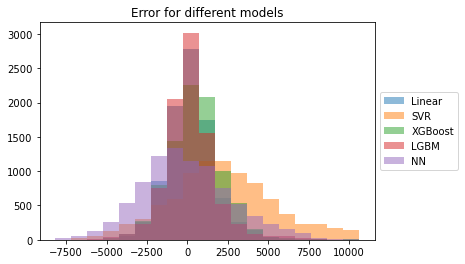

In [49]:
nbins = int (np.sqrt(len(y_test[0])))
# print (nbins)

for name in df_errors.keys():
    max_value = 0
    min_value = 0
    if max(df_errors[name]['Error']) >= max_value:
        max_value = max(df_errors[name]['Error'])
    if min(df_errors[name]['Error']) <= min_value:
        min_value = min(df_errors[name]['Error'])
bin_edges = np.linspace(min_value, max_value, nbins + 1)

plt.title('Error for different models')
for name in df_errors.keys():
    plt.hist(df_errors[name]['Error'], bins = bin_edges, label=name, alpha=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [50]:
variables = ['mean', 'sigma', 'mean+-1sigma', 'mean+-2sigma', 'mean+-3sigma', 'mean+-4sigma']
nsigmas = 4

error_stats = pd.DataFrame()

for name in df_errors.keys():
    aux = []
    length = len(df_errors[name])
    mean = np.mean(df_errors[name]['Error'])
    aux.append(mean)
    sigma = np.std(df_errors[name]['Error'])
    aux.append(sigma)
    for n in range(1,nsigmas+1):
        auxdf = df_errors[name][(df_errors[name]['Error']>=mean-n*sigma) & (df_errors[name]['Error']<=mean+n*sigma)]
        aux.append(len(auxdf)/length)
    error_stats [name] = aux

error_stats.index = variables
error_stats

    

Linear          SVR      XGBoost         LGBM           NN
mean           221.879141  2233.654311   516.236493   196.034407   -49.858034
sigma         1502.199434  3364.393156  1683.190528  1605.864628  2797.216028
mean+-1sigma     0.743151     0.702397     0.714954     0.782306     0.696689
mean+-2sigma     0.943265     0.940183     0.951941     0.946918     0.945548
mean+-3sigma     0.989840     0.998973     0.990753     0.979795     0.997831
mean+-4sigma     0.997260     1.000000     0.997489     0.993493     1.000000

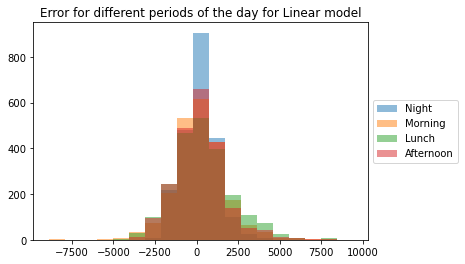

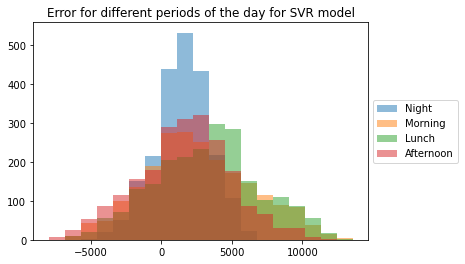

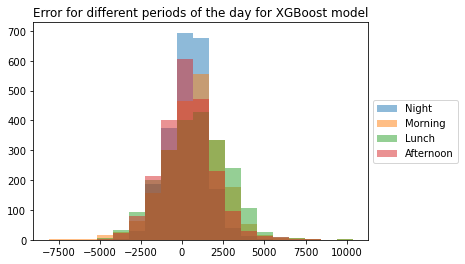

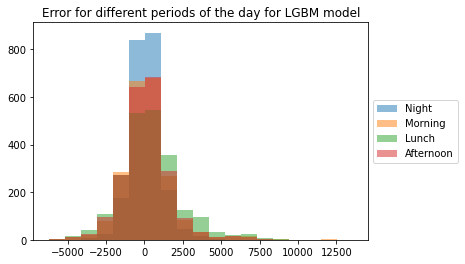

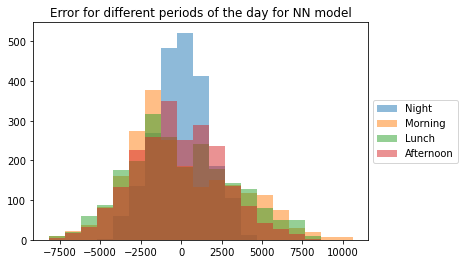

In [51]:
day_division = {
    'Night': [x for x in range (6)],
    'Morning': [x for x in range (6,12)],
    'Lunch': [x for x in range (12, 18)],
    'Afternoon': [x for x in range (18,24)]
    
}

nbins = int (np.sqrt(len(y_test[0])))
# print (nbins)

for name in df_errors.keys():
    plt.title('Error for different periods of the day for '+name+' model')
    max_value = 0
    min_value = 0
    for period in day_division.keys():
        auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
        if max(auxdf['Error']) >= max_value:
            max_value = max(auxdf['Error'])
        if min(auxdf['Error']) <= min_value:
            min_value = min(auxdf['Error'])
    bin_edges = np.linspace(min_value, max_value, nbins + 1)
    for period in day_division.keys():
        auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
        plt.hist(auxdf['Error'], bins = bin_edges, label=period, alpha=0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()